# EDA 및 분석 수행

In [83]:
# 실행 결과 경고 메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

# 데이터 구성 및 시각화 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 설정
matplotlib.rc("font", family="NanumGothic Eco")
matplotlib.rc('axes', unicode_minus=False)

In [52]:
data = pd.read_csv("RFM_product.csv", encoding='euc-kr')
data.head()


,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,...,주소대분류,주소소분류,계절,날짜,요일,연령대,구매시간대,R,F,M
0,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207.0,매장C,10:04,...,용인 수지구,풍덕천동,겨울,2023-01-06,금,40대,8~11시,11,75,1505970.0
1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403.0,매장C,10:09,...,용인 수지구,풍덕천동,겨울,2023-01-06,금,30대,8~11시,55,11,144730.0
2,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083.0,매장C,10:12,...,용인 수지구,성복동,겨울,2023-01-06,금,50대,8~11시,250,12,436583.0
3,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849.0,매장C,10:23,...,용인 수지구,풍덕천동,겨울,2023-01-06,금,60대,8~11시,2,92,1973350.0
4,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507.0,매장C,10:29,...,용인 수지구,풍덕천동,겨울,2023-01-06,금,70대,8~11시,0,47,1420890.0


In [53]:
# 1. 계절별 물품대분류의 총 구매수량 계산
total_season_purchases = data.groupby('계절')['구매수량'].sum().rename('전체_판매수')

# 2. 물품대분류별 계절별 총 구매수량과 전체 구매수량을 결합하여 비율 계산
top5_per_season = data.merge(total_season_purchases, on='계절')
top5_per_season['판매 비율 (%)'] = (top5_per_season['구매수량'] / top5_per_season['전체_판매수']) * 100

top5_per_season

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,...,계절,날짜,요일,연령대,구매시간대,R,F,M,전체_판매수,판매 비율 (%)
0,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207.0,매장C,10:04,...,겨울,2023-01-06,금,40대,8~11시,11,75,1505970.0,62771.2,0.001593
1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403.0,매장C,10:09,...,겨울,2023-01-06,금,30대,8~11시,55,11,144730.0,62771.2,0.001593
2,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083.0,매장C,10:12,...,겨울,2023-01-06,금,50대,8~11시,250,12,436583.0,62771.2,0.001593
3,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849.0,매장C,10:23,...,겨울,2023-01-06,금,60대,8~11시,2,92,1973350.0,62771.2,0.001593
4,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507.0,매장C,10:29,...,겨울,2023-01-06,금,70대,8~11시,0,47,1420890.0,62771.2,0.004779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288884,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680.0,매장A,13:26,...,가을,2023-11-04,토,50대,11~14시,0,49,1014353.0,68811.5,0.001453
288885,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212.0,매장A,10:58,...,가을,2023-11-04,토,40대,8~11시,0,20,359908.0,68811.5,0.001453
288886,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658.0,매장A,14:36,...,가을,2023-11-04,토,40대,14~18시,0,37,1211918.0,68811.5,0.001453
288887,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169.0,매장A,16:23,...,가을,2023-11-04,토,60대,14~18시,0,12,424133.0,68811.5,0.001453



# 계절별 물품대분류



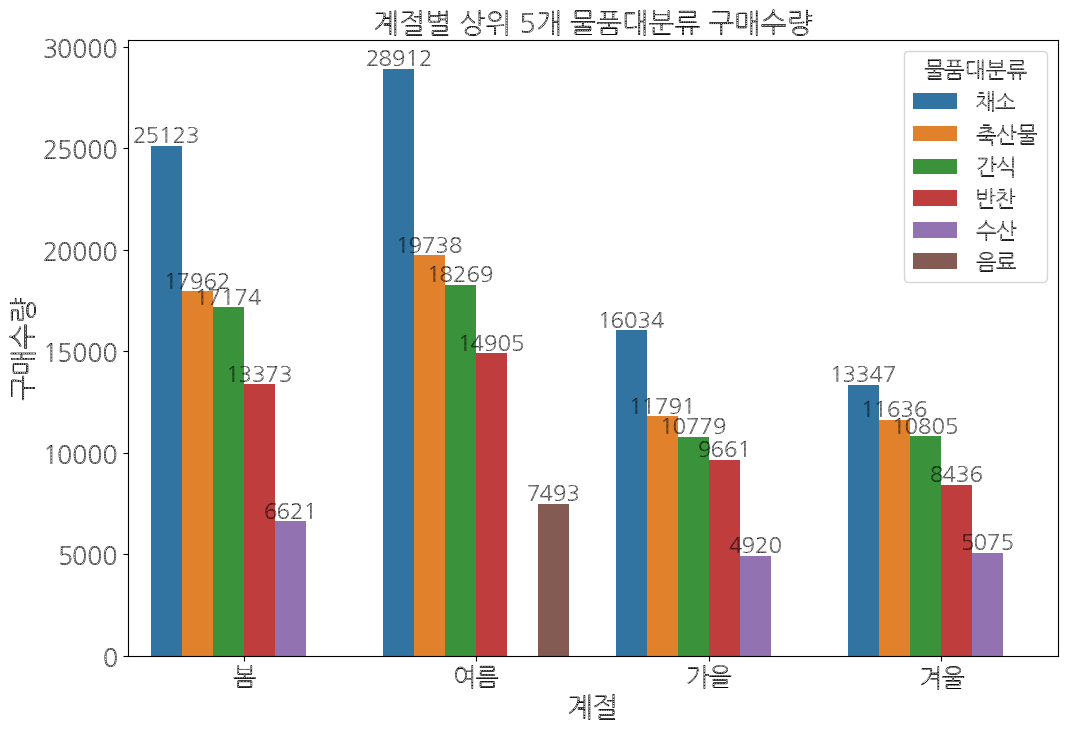

In [54]:


# 계절별 상위 5개의 물품대분류를 가져오기 위한 데이터 처리
top_categories_per_season = data.groupby(['계절', '물품대분류'])['구매수량'].sum().reset_index()
top_categories_per_season = top_categories_per_season.sort_values(['계절', '구매수량'], ascending=[True, False])

# 계절별 상위 5개 물품대분류 선택
top5_per_season = top_categories_per_season.groupby('계절').head(5)

# 전체 계절별 총 구매수량 계산
season_totals = data.groupby('계절')['구매수량'].sum().rename('전체_판매수')

# 계절 순서 지정
season_order = ['봄', '여름', '가을', '겨울']
top5_per_season['계절'] = pd.Categorical(top5_per_season['계절'], categories=season_order, ordered=True)

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top5_per_season, x='계절', y='구매수량', hue='물품대분류', order=season_order)

# 각 막대 위에 구매수량 값 표시
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', 
                    va='bottom', 
                    fontsize=16)

# 폰트 크기 조정
plt.title('계절별 상위 5개 물품대분류 구매수량', fontsize=20)
plt.xlabel('계절', fontsize=20)
plt.ylabel('구매수량', fontsize=20)
plt.legend(title='물품대분류', fontsize=16, title_fontsize=16, loc='best')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()



# 계절별 물품중분류

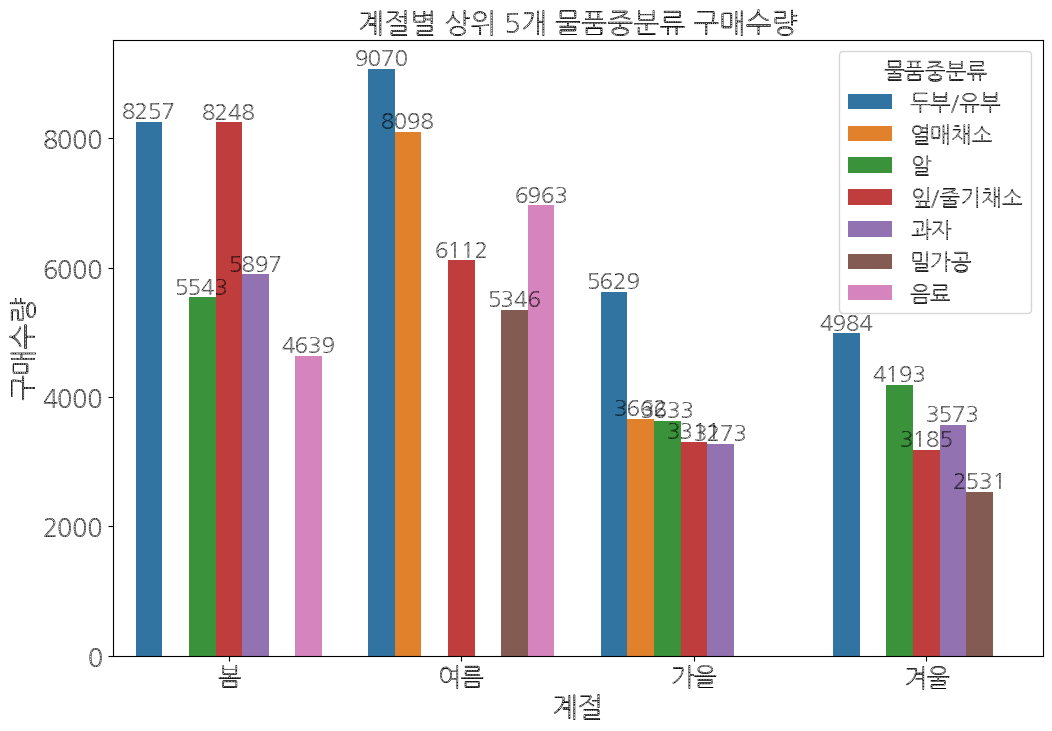

In [55]:
# 계절별 상위 5개의 물품중분류를 가져오기 위한 데이터 처리
top_categories_per_season = data.groupby(['계절', '물품중분류'])['구매수량'].sum().reset_index()
top_categories_per_season = top_categories_per_season.sort_values(['계절', '구매수량'], ascending=[True, False])

# 계절별 상위 5개 물품중분류 선택
top5_per_season = top_categories_per_season.groupby('계절').head(5)

# 전체 계절별 총 구매수량 계산
season_totals = data.groupby('계절')['구매수량'].sum().rename('전체_판매수')

# 계절 순서 지정
season_order = ['봄', '여름', '가을', '겨울']
top5_per_season['계절'] = pd.Categorical(top5_per_season['계절'], categories=season_order, ordered=True)

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top5_per_season, x='계절', y='구매수량', hue='물품중분류', order=season_order)

# 각 막대 위에 구매수량 값 표시
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', 
                    va='bottom', 
                    fontsize=16)

# 폰트 크기 조정
plt.title('계절별 상위 5개 물품중분류 구매수량', fontsize=20)
plt.xlabel('계절', fontsize=20)
plt.ylabel('구매수량', fontsize=20)
plt.legend(title='물품중분류', fontsize=16, title_fontsize=16, loc='best')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

# 계절별 물품소분류

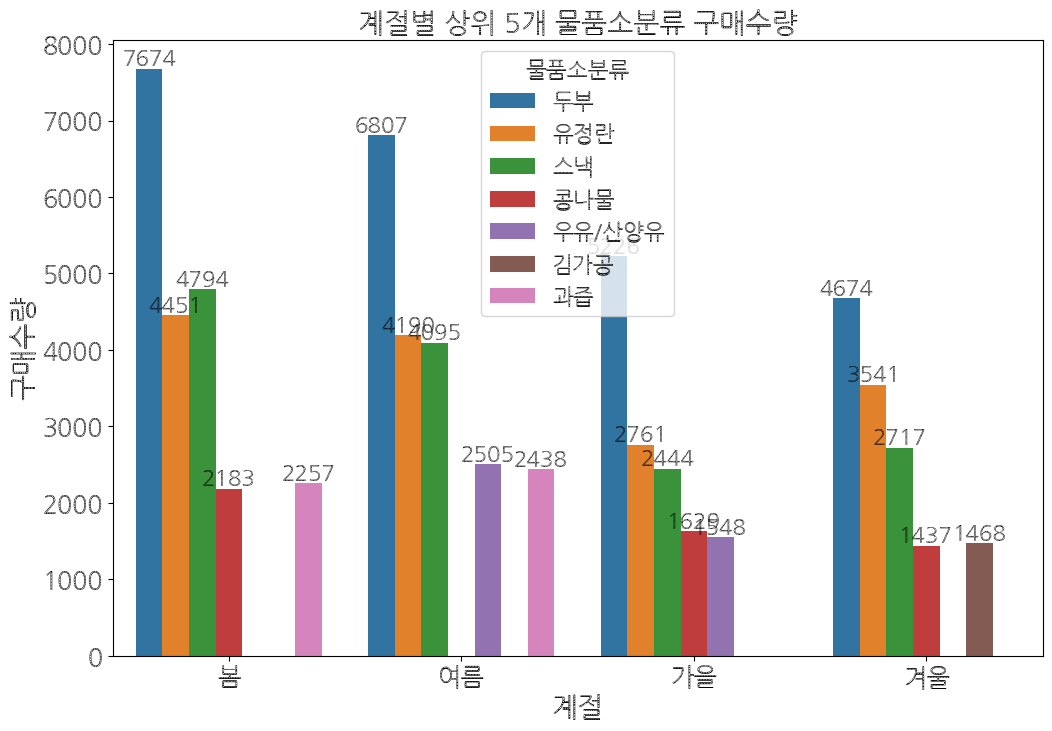

In [56]:
# 계절별 상위 5개의 물품소분류를 가져오기 위한 데이터 처리
top_categories_per_season = data.groupby(['계절', '물품소분류'])['구매수량'].sum().reset_index()
top_categories_per_season = top_categories_per_season.sort_values(['계절', '구매수량'], ascending=[True, False])

# 계절별 상위 5개 물품소분류 선택
top5_per_season = top_categories_per_season.groupby('계절').head(5)

# 전체 계절별 총 구매수량 계산
season_totals = data.groupby('계절')['구매수량'].sum().rename('전체_판매수')

# 계절 순서 지정
season_order = ['봄', '여름', '가을', '겨울']
top5_per_season['계절'] = pd.Categorical(top5_per_season['계절'], categories=season_order, ordered=True)

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top5_per_season, x='계절', y='구매수량', hue='물품소분류', order=season_order)

# 각 막대 위에 구매수량 값 표시
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', 
                    va='bottom', 
                    fontsize=16)

# 폰트 크기 조정
plt.title('계절별 상위 5개 물품소분류 구매수량', fontsize=20)
plt.xlabel('계절', fontsize=20)
plt.ylabel('구매수량', fontsize=20)
plt.legend(title='물품소분류', fontsize=16, title_fontsize=16, loc='best')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()



여름 - 음료 분석

계절별 물품대분류/중분류/소분류가 대부분 비슷했으나, 유독 여름의 대분류와 중분류에서 음료가 높게 나오는 것을 발견함.
이에 여름철에 어떤 음료가 나오는지 보고자 소분류 분석을 시행.


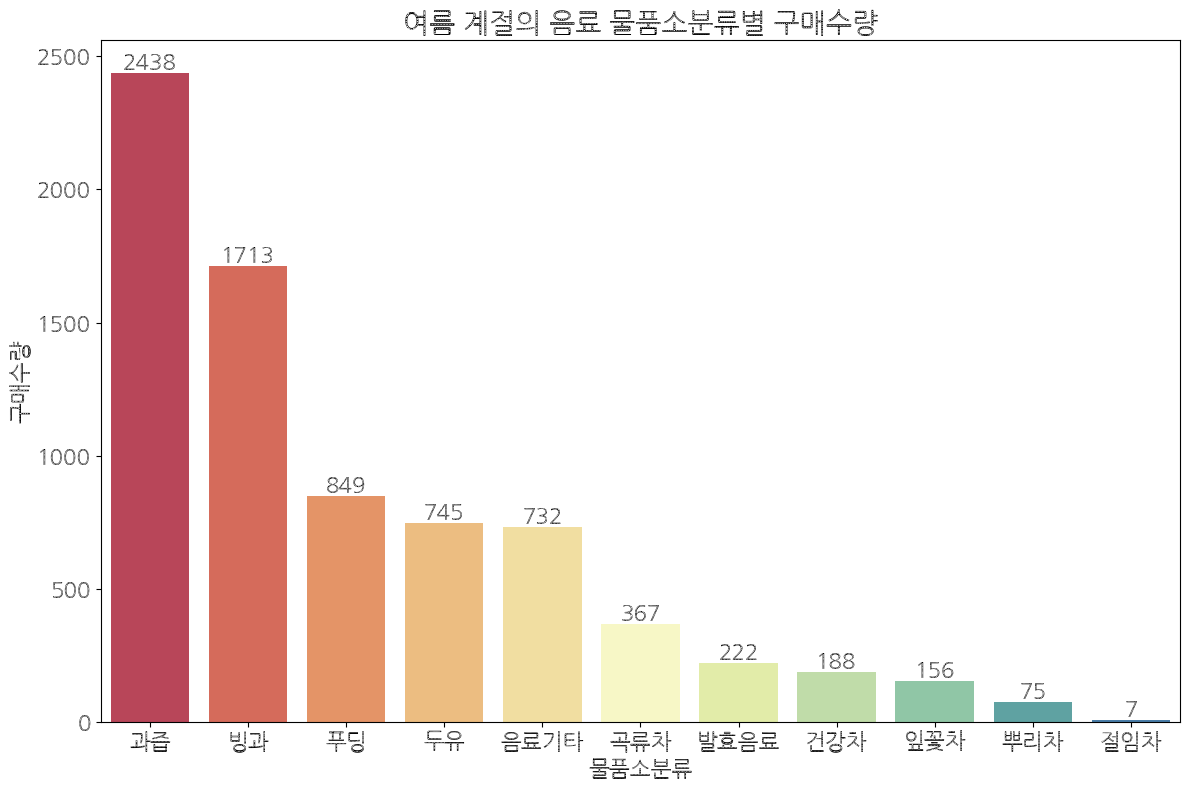

In [57]:
# 여름 계절에서 음료에 해당하는 데이터 필터링
summer_drinks_data = data[(data['계절'] == '여름') & (data['물품대분류'] == '음료')]

# 물품소분류별로 구매수량 집계
subcategory_summer_drinks = summer_drinks_data.groupby('물품소분류')['구매수량'].sum().reset_index()

# 물품소분류별로 구매수량을 내림차순으로 정렬
subcategory_summer_drinks = subcategory_summer_drinks.sort_values(by='구매수량', ascending=False)

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=subcategory_summer_drinks, x='물품소분류', y='구매수량', palette='Spectral')

# 폰트 크기 조정
plt.title('여름 계절의 음료 물품소분류별 구매수량', fontsize=20)
plt.xlabel('물품소분류', fontsize=16)
plt.ylabel('구매수량', fontsize=16)
plt.xticks(rotation=0, fontsize=16)  # x축 레이블 회전 및 크기 조정
plt.yticks(fontsize=16)

# 각 막대 위에 구매수량 값 표시
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', 
                    va='bottom', 
                    fontsize=16)

plt.tight_layout()
plt.show()

In [58]:
# 데이터 불러오기
data=pd.read_csv("RFM_member.csv", encoding='euc-kr')

data1.head()

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,...,주소대분류,주소소분류,계절,날짜,요일,연령대,구매시간대,R,F,M
0,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207.0,매장C,10:04,...,용인 수지구,풍덕천동,겨울,2023-01-06,금,40대,8~11시,11,75,1505970.0
1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403.0,매장C,10:09,...,용인 수지구,풍덕천동,겨울,2023-01-06,금,30대,8~11시,55,11,144730.0
2,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083.0,매장C,10:12,...,용인 수지구,성복동,겨울,2023-01-06,금,50대,8~11시,250,12,436583.0
3,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849.0,매장C,10:23,...,용인 수지구,풍덕천동,겨울,2023-01-06,금,60대,8~11시,2,92,1973350.0
4,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507.0,매장C,10:29,...,용인 수지구,풍덕천동,겨울,2023-01-06,금,70대,8~11시,0,47,1420890.0


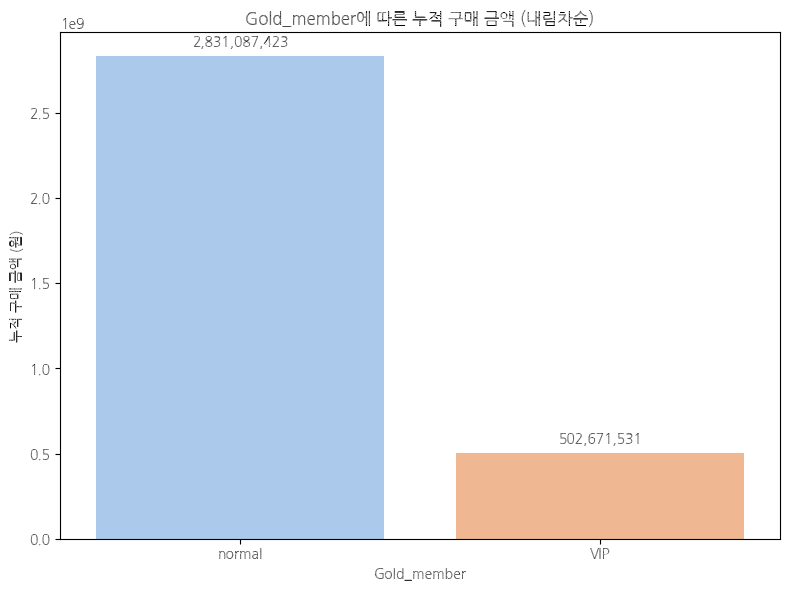

In [59]:


# Gold_member별 누적 구매금액 합계 계산 및 내림차순 정렬
rfm_sums = data.groupby('Gold_member')['M'].sum().reset_index()
rfm_sums = rfm_sums.sort_values(by='M', ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel", len(rfm_sums))  # 각 막대마다 다른 색상 적용
p2 = sns.barplot(x='Gold_member', y='M', data=rfm_sums, palette=colors)

# 각 막대 위에 구매 금액 표시 (글씨 크기와 위치 조정)
for p in p2.patches:
    amount = int(p.get_height())
    if amount > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p2.annotate(f'{amount:,}',  # 천 단위 콤마 추가
                    (p.get_x() + p.get_width() / 2., amount),
                    ha='center', va='bottom', 
                    fontsize=10, color='black',  # 글씨 크기와 색상 조정
                    xytext=(0, 5), textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('Gold_member에 따른 누적 구매 금액 (내림차순)')
plt.xlabel('Gold_member')
plt.ylabel('누적 구매 금액 (원)')

plt.tight_layout()
plt.show()



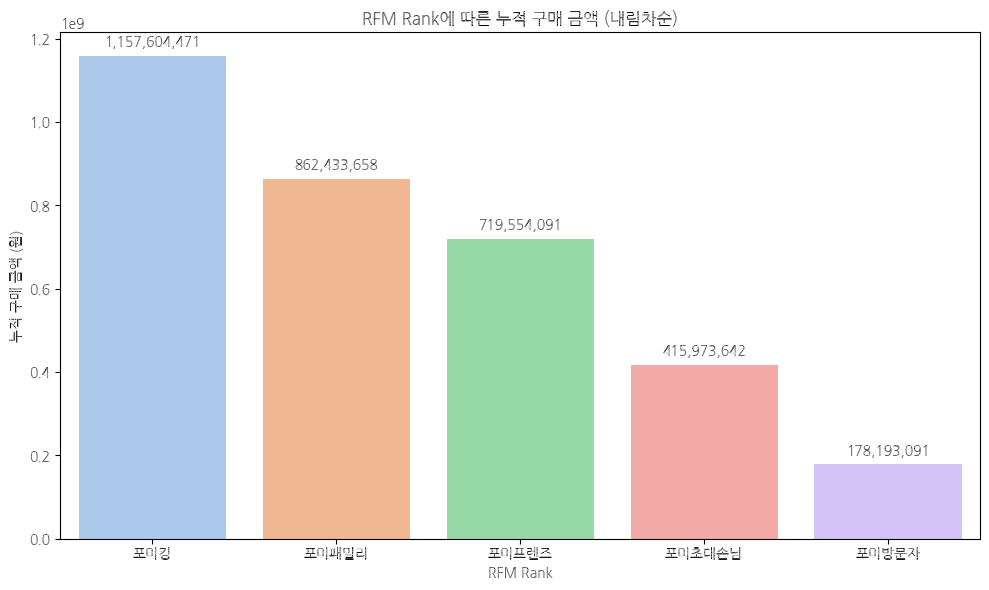

In [60]:
# RFM_rank별 누적 구매금액 합계 계산 및 내림차순 정렬
rfm_sums = data.groupby('RFM_rank')['M'].sum().reset_index()
rfm_sums = rfm_sums.sort_values(by='M', ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(rfm_sums))  # 각 막대마다 다른 색상 적용
p2 = sns.barplot(x='RFM_rank', y='M', data=rfm_sums, palette=colors)

# 각 막대 위에 구매 금액 표시 (글씨 크기와 위치 조정)
for p in p2.patches:
    amount = int(p.get_height())
    if amount > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p2.annotate(f'{amount:,}',  # 천 단위 콤마 추가
                    (p.get_x() + p.get_width() / 2., amount),
                    ha='center', va='bottom', 
                    fontsize=10, color='black',  # 글씨 크기와 색상 조정
                    xytext=(0, 5), textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('RFM Rank에 따른 누적 구매 금액 (내림차순)')
plt.xlabel('RFM Rank')
plt.ylabel('누적 구매 금액 (원)')

plt.tight_layout()
plt.show()

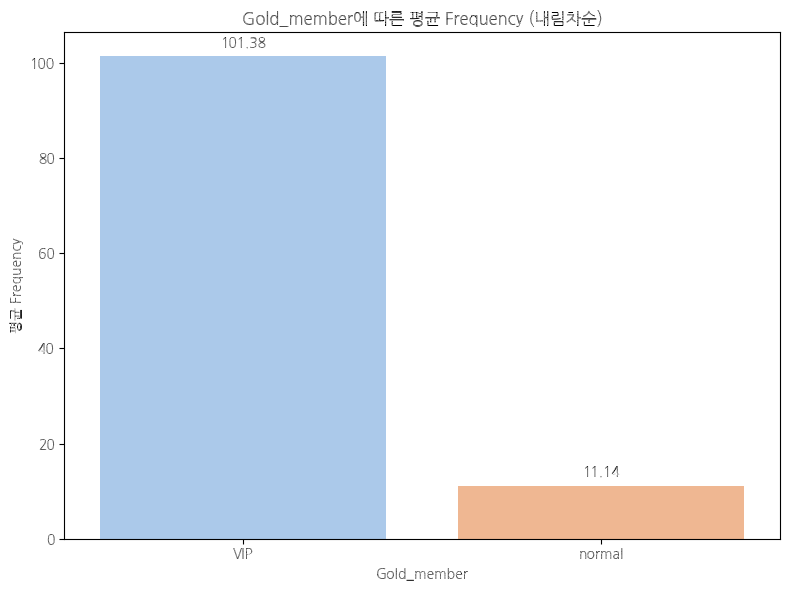

In [61]:


# Gold_member별 평균 Frequency 계산 및 내림차순 정렬
rfm_means = data.groupby('Gold_member')['F'].mean().reset_index()
rfm_means = rfm_means.sort_values(by='F', ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel", len(rfm_means))  # 각 막대마다 다른 색상 적용
p2 = sns.barplot(x='Gold_member', y='F', data=rfm_means, palette=colors)

# 각 막대 위에 평균 Recency 표시 (글씨 크기와 위치 조정)
for p in p2.patches:
    amount = p.get_height()
    if amount > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p2.annotate(f'{amount:.2f}',  # 소수점 둘째 자리까지 표시
                    (p.get_x() + p.get_width() / 2., amount),
                    ha='center', va='bottom', 
                    fontsize=10, color='black',  # 글씨 크기와 색상 조정
                    xytext=(0, 5), textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('Gold_member에 따른 평균 Frequency (내림차순)')
plt.xlabel('Gold_member')
plt.ylabel('평균 Frequency')

plt.tight_layout()
plt.show()



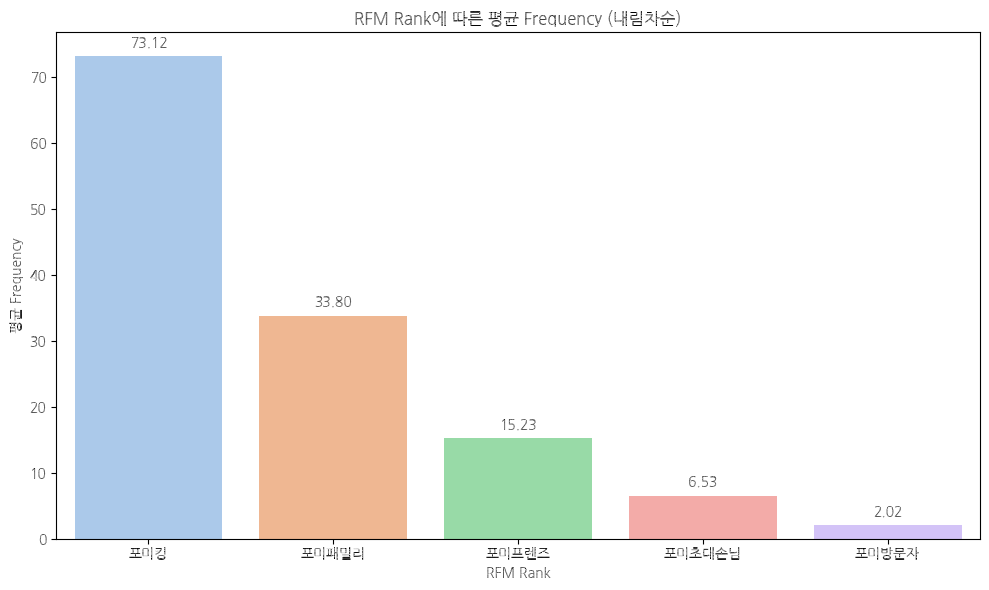

In [62]:


# RFM_rank별 평균 Frequency 계산 및 내림차순 정렬
rfm_means = data.groupby('RFM_rank')['F'].mean().reset_index()
rfm_means = rfm_means.sort_values(by='F', ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(rfm_means))  # 각 막대마다 다른 색상 적용
p2 = sns.barplot(x='RFM_rank', y='F', data=rfm_means, palette=colors)

# 각 막대 위에 평균 Recency 표시 (글씨 크기와 위치 조정)
for p in p2.patches:
    amount = p.get_height()
    if amount > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p2.annotate(f'{amount:.2f}',  # 소수점 둘째 자리까지 표시
                    (p.get_x() + p.get_width() / 2., amount),
                    ha='center', va='bottom', 
                    fontsize=10, color='black',  # 글씨 크기와 색상 조정
                    xytext=(0, 5), textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('RFM Rank에 따른 평균 Frequency (내림차순)')
plt.xlabel('RFM Rank')
plt.ylabel('평균 Frequency')

plt.tight_layout()
plt.show()



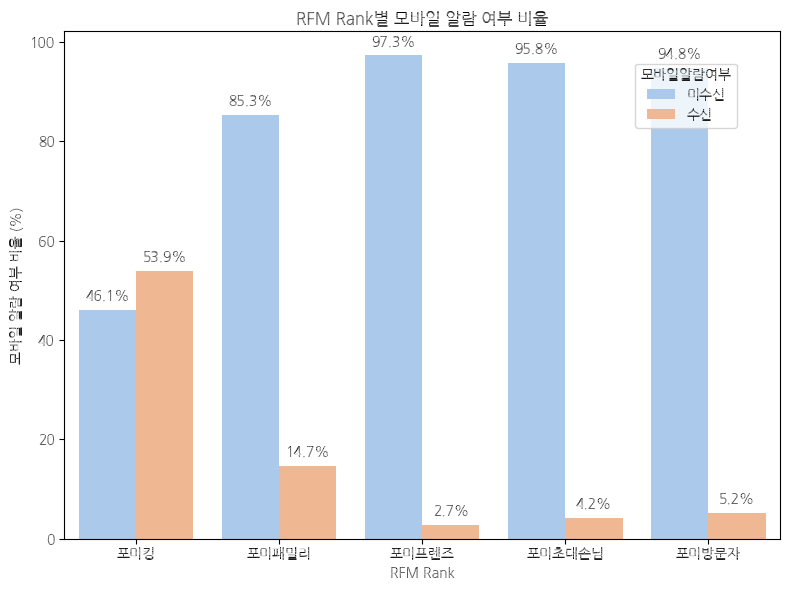

In [63]:


# RFM_rank별 배송서비스신청여부 빈도수 계산
delivery_counts = data.groupby(['RFM_rank', '모바일알람여부']).size().reset_index(name='빈도수')

# RFM_rank별 전체 빈도수 계산
total_counts = delivery_counts.groupby('RFM_rank')['빈도수'].transform('sum')

# 배송서비스신청여부의 비율 계산
delivery_counts['비율'] = (delivery_counts['빈도수'] / total_counts) * 100

# 막대 그래프 생성
plt.figure(figsize=(8, 6))
p2 = sns.barplot(x='RFM_rank', y='비율', hue='모바일알람여부', data=delivery_counts,  order=['포미킹', '포미패밀리', '포미프렌즈', '포미초대손님', '포미방문자'], palette="pastel")

# 각 막대 위에 비율 표시
for p in p2.patches:
    height = p.get_height()
    if height > 0:  # 비율이 0보다 큰 경우에만 레이블 표시
        p2.annotate(f'{height:.1f}%',  # 소수점 한 자리까지 표시
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    fontsize=10, color='black',  # 글씨 크기와 색상 조정
                    xytext=(0, 5), textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('RFM Rank별 모바일 알람 여부 비율')
plt.xlabel('RFM Rank')
plt.ylabel('모바일 알람 여부 비율 (%)')

# 범례 설정: 그래프 내부에 위치시키기
plt.legend(title='모바일알람여부', loc='upper right', bbox_to_anchor=(0.95, 0.95), frameon=True)

plt.tight_layout()
plt.show()



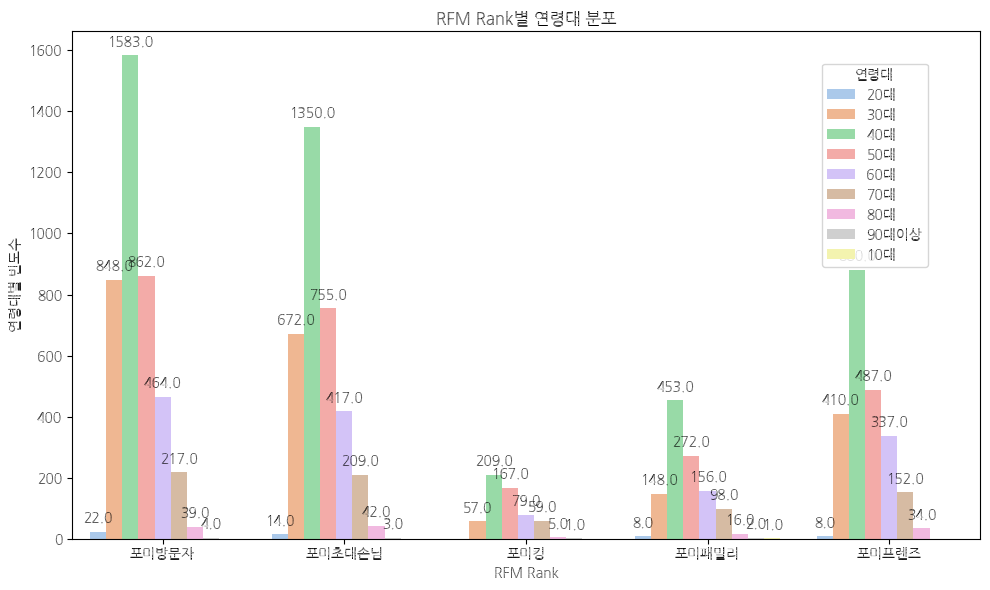

In [64]:


# RFM_rank별 연령대 빈도수 계산
age_counts = data.groupby(['RFM_rank', '연령대']).size().reset_index(name='빈도수')

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
p2 = sns.barplot(x='RFM_rank', y='빈도수', hue='연령대', data=age_counts, palette="pastel")

# 각 막대 위에 빈도수 표시
for p in p2.patches:
    height = p.get_height()
    if height > 0:  # 빈도수가 0보다 큰 경우에만 레이블 표시
        p2.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    fontsize=10, color='black',  # 글씨 크기와 색상 조정
                    xytext=(0, 5), textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('RFM Rank별 연령대 분포')
plt.xlabel('RFM Rank')
plt.ylabel('연령대별 빈도수')

# 범례 설정: 그래프 내부에 위치시키기
plt.legend(title='연령대', loc='upper right', bbox_to_anchor=(0.95, 0.95), frameon=True)

plt.tight_layout()
plt.show()



In [65]:
data=pd.read_csv("RFM_product.csv", encoding='euc-kr')

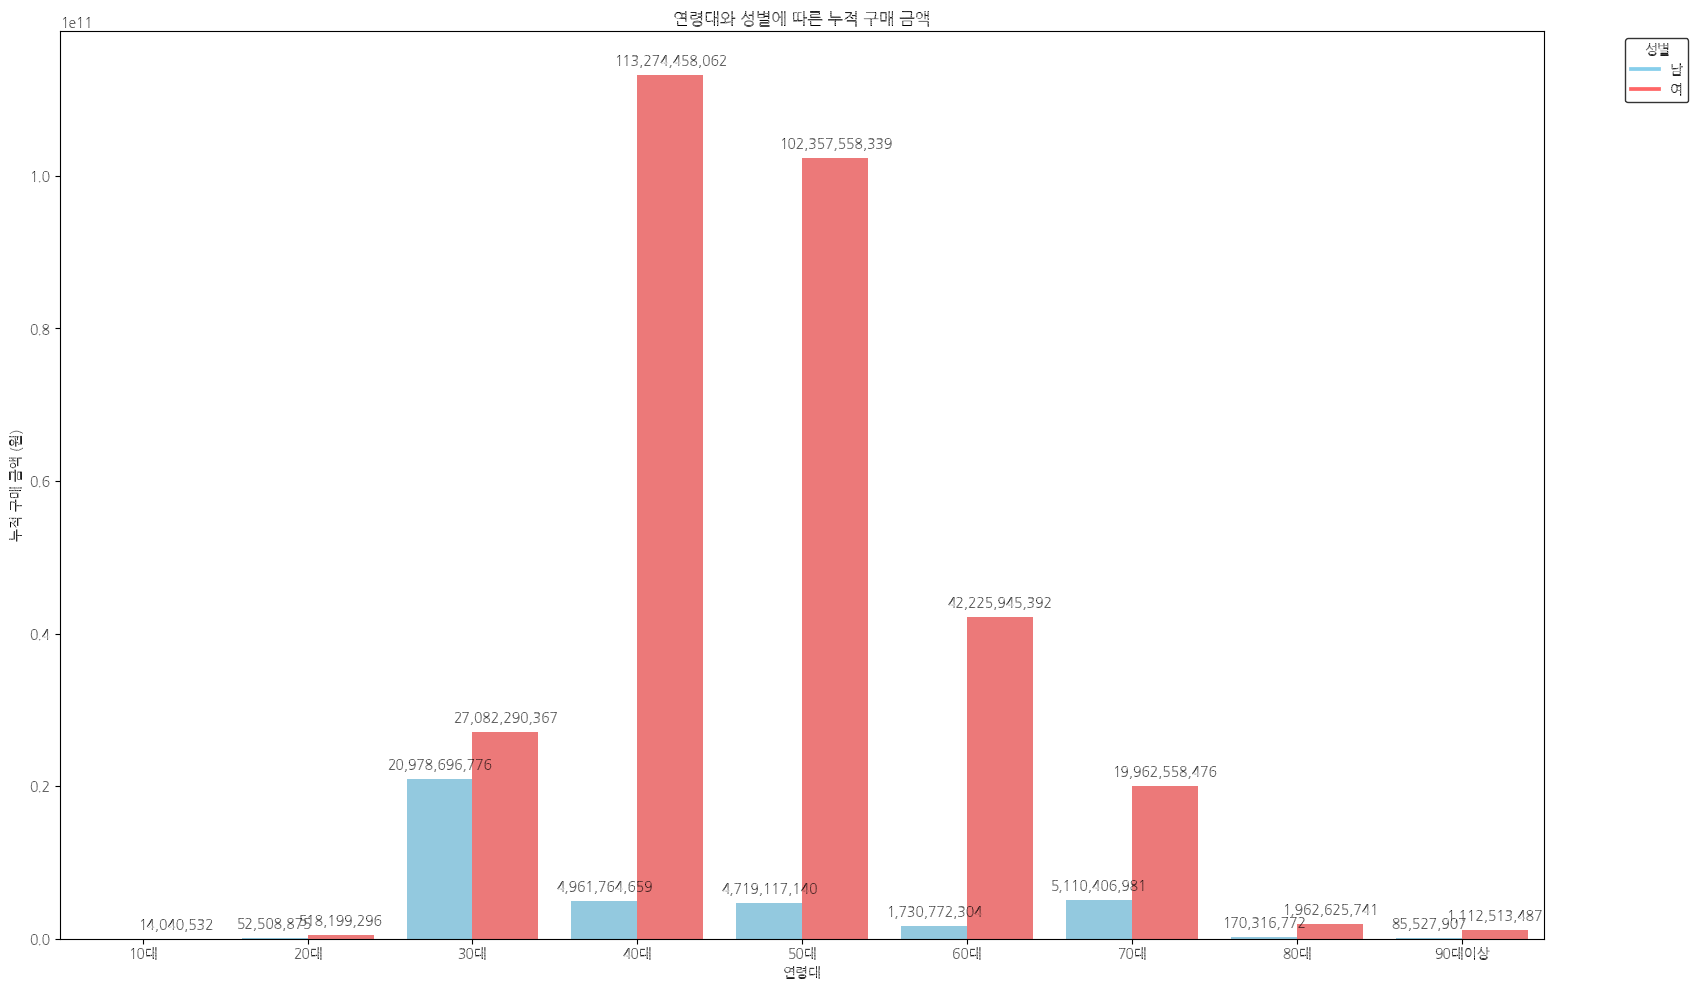

In [66]:


# 연령대와 성별에 따른 구매금액 합계 계산
age_gender_sums = data.groupby(['연령대', '성별'])['M'].sum().unstack(fill_value=0)

# 데이터프레임을 긴 형식으로 변환하여 seaborn에서 사용하기 좋게 함
age_gender_sums = age_gender_sums.reset_index().melt(id_vars='연령대', value_name='구매금액', var_name='성별')

# 고정된 색상 팔레트 설정
custom_palette = {"남": "#87CEEB", "여": "#FF6666"}  # 남성은 하늘색, 여성은 주황색으로 고정

# 막대 그래프 생성
plt.figure(figsize=(17, 10))
p2 = sns.barplot(x='연령대', y='구매금액', hue='성별', data=age_gender_sums, palette=custom_palette, order=sorted(age_gender_sums['연령대'].unique()))

# 각 막대 위에 구매 금액 표시 (글씨 크기와 위치 조정)
for p in p2.patches:
    amount = int(p.get_height())
    if amount > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p2.annotate(f'{amount:,}',  # 천 단위 콤마 추가
                    (p.get_x() + p.get_width() / 2., amount),
                    ha='center', va='bottom', 
                    fontsize=10, color='black',  # 글씨 크기와 색상 조정
                    xytext=(0, 5), textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('연령대와 성별에 따른 누적 구매 금액')
plt.xlabel('연령대')
plt.ylabel('누적 구매 금액 (원)')

# 범례 설정: 색상 지정 및 그래프 밖으로 이동
legend = plt.legend(title='성별', labels=['남', '여'], bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor="black")
legend.legendHandles[0].set_color("#87CEEB")
legend.legendHandles[1].set_color("#FF6666")

plt.tight_layout()
plt.show()



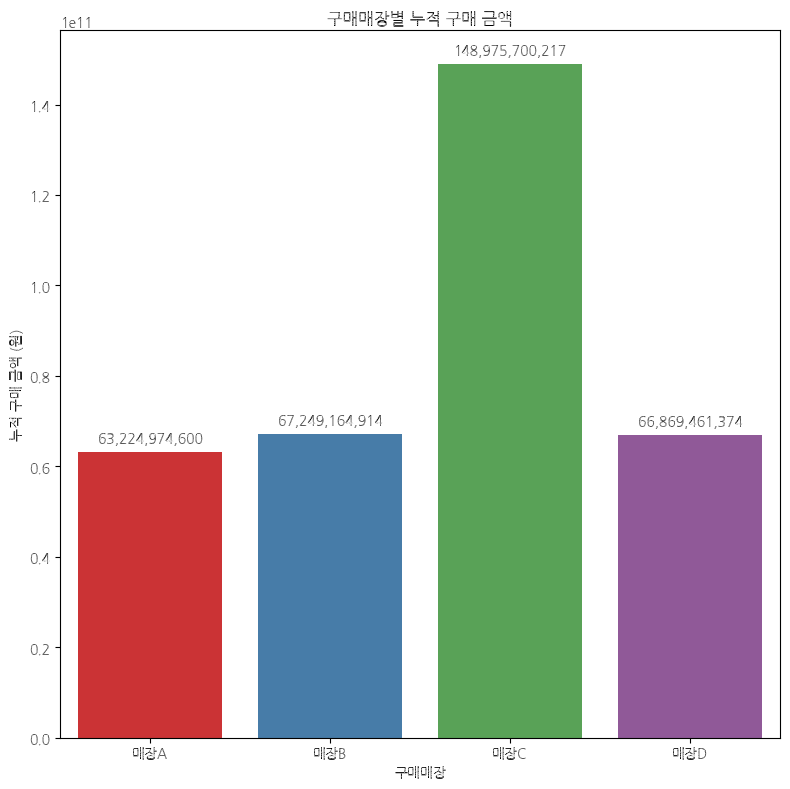

In [67]:
# 지점별 구매금액 합계 계산
store_sums = data.groupby('구매매장')['M'].sum().reset_index()

# 막대 그래프 생성 (새로운 색상 팔레트 적용)
plt.figure(figsize=(8, 8))
p2 = sns.barplot(x='구매매장', y='M', data=store_sums, palette="Set1")  # 또는 다른 팔레트 사용 가능

# 각 막대 위에 구매 금액 표시 (글씨 크기와 위치 조정)
for p in p2.patches:
    amount = int(p.get_height())
    if amount > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p2.annotate(f'{amount:,}',  # 천 단위 콤마 추가
                    (p.get_x() + p.get_width() / 2., amount),
                    ha='center', va='bottom', 
                    fontsize=10, color='black',  # 글씨 크기와 색상 조정
                    xytext=(0, 5), textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('구매매장별 누적 구매 금액')
plt.xlabel('구매매장')
plt.ylabel('누적 구매 금액 (원)')

plt.tight_layout()
plt.show()


채소     74559
축산물    51450
간식     45516
반찬     35818
수산     19953
Name: 물품대분류, dtype: int64


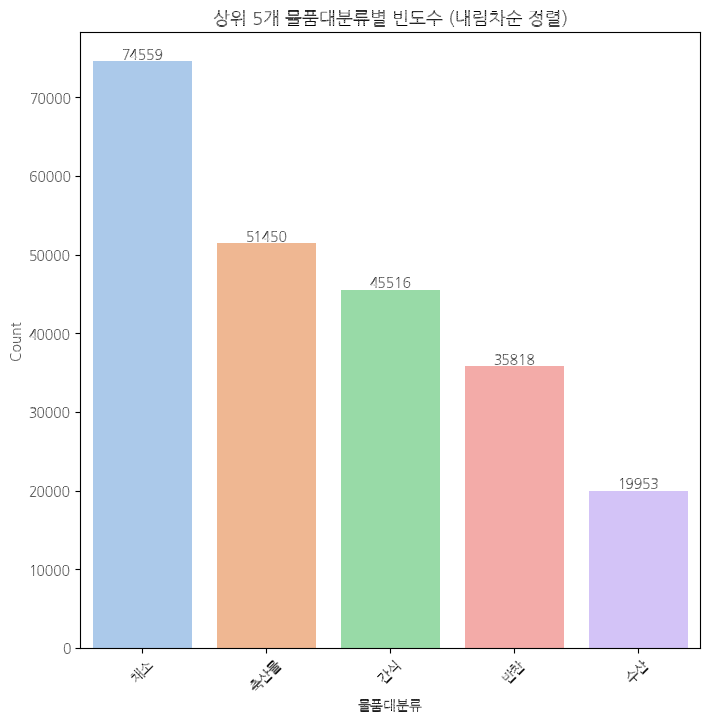

In [68]:


# 물품대분류의 값 개수 계산 및 내림차순 정렬 후 상위 5개 선택
plc_counts = data['물품대분류'].value_counts().nlargest(5)
print(plc_counts)

# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 8))

# pastel 팔레트 적용
colors = sns.color_palette("pastel", len(plc_counts))

# countplot 생성 및 값 레이블 추가
p1 = sns.countplot(x='물품대분류', data=data, ax=ax, palette=colors, order=plc_counts.index)

# 각 막대 위에 카운트 수 표시
for container in p1.containers:
    p1.bar_label(container, fmt='%d', label_type='edge')  # 각 container에 대해 레이블 추가

# 그래프 제목 및 축 레이블 설정
ax.set_title('상위 5개 물품대분류별 빈도수 (내림차순 정렬)', fontsize=13)
ax.set_xlabel('물품대분류')
ax.set_ylabel('Count')
plt.xticks(rotation=45)

plt.show()



두부/유부     20689
잎/줄기채소    18130
알         16433
과자        13559
열매채소      11842
Name: 물품중분류, dtype: int64


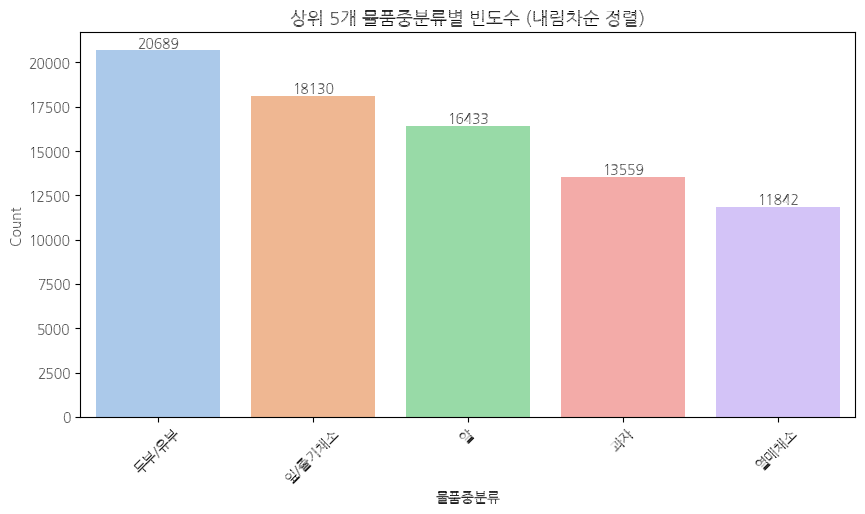

In [69]:
# 물품중분류의 값 개수 계산 및 내림차순 정렬 후 상위 15개 선택
plc_counts = data['물품중분류'].value_counts().nlargest(5)
print(plc_counts)

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 5))

# pastel 팔레트 적용
colors = sns.color_palette("pastel", len(plc_counts))

# countplot 생성 및 값 레이블 추가
p2 = sns.countplot(x='물품중분류', data=data, ax=ax, palette=colors, order=plc_counts.index)

# 각 막대 위에 카운트 수 표시
for container in p2.containers:
    p2.bar_label(container, fmt='%d')  # 각 container에 대해 레이블 추가

# 그래프 제목 및 축 레이블 설정
ax.set_title('상위 5개 물품중분류별 빈도수 (내림차순 정렬)', fontsize=13)
ax.set_xlabel('물품중분류')
ax.set_ylabel('Count')
plt.xticks(rotation=45)

plt.show()


Text(0, 0.5, 'Count')

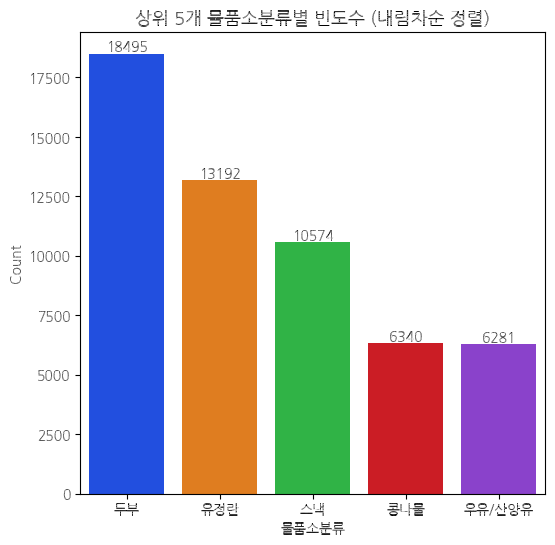

In [70]:
# 물품중분류의 값 개수 계산 및 내림차순 정렬 후 상위 5개 선택
plc_counts = data['물품소분류'].value_counts().nlargest(5)

# 그래프 생성
fig, ax = plt.subplots(figsize=(6, 6))

# bright 팔레트 적용
colors = sns.color_palette("bright", len(plc_counts))

# countplot 생성 및 값 레이블 추가
p3 = sns.countplot(x='물품소분류', data=data, ax=ax, palette=colors, order=plc_counts.index)

# 각 막대 위에 카운트 수 표시
for container in p3.containers:
    p3.bar_label(container, fmt='%d')  # 각 container에 대해 레이블 추가

# 그래프 제목 및 축 레이블 설정
ax.set_title('상위 5개 물품소분류별 빈도수 (내림차순 정렬)', fontsize=13)
ax.set_xlabel('물품소분류')
ax.set_ylabel('Count')


In [71]:


import warnings

warnings.filterwarnings('ignore')

import re  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석 패키지
from scipy import stats
import scipy.stats
import pandas as pd
import dask.dataframe as dd
import seaborn as sns

import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("RFM_product.csv",encoding='euc-kr')

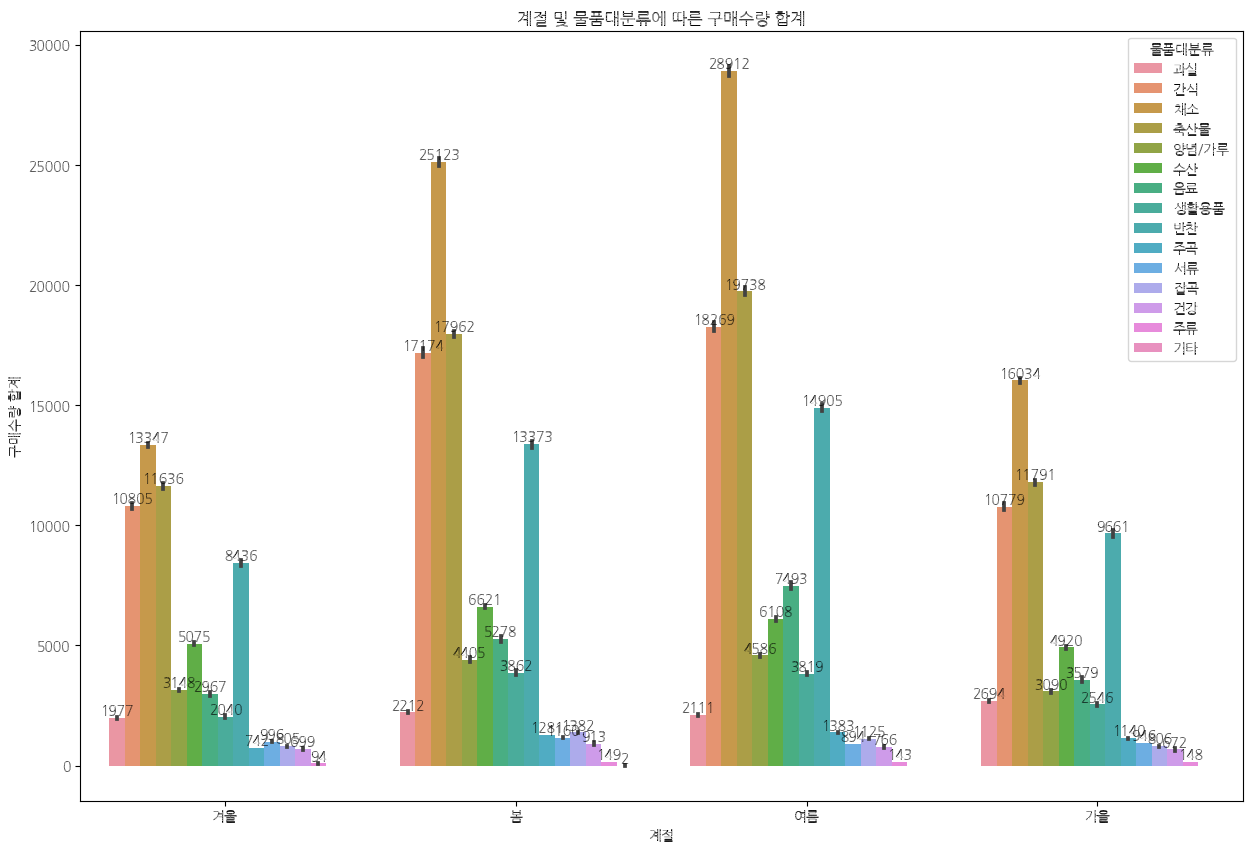

In [74]:
plt.figure(figsize=(15, 10))

# 물품대분류와 성별에 따른 물품구매건수의 합계를 시각화
p1 = sns.barplot(x='계절', y='구매수량', hue='물품대분류', data=data, estimator=sum)

# 각 막대 위에 구매 건수 합계 표시
for p in p1.patches:
    height = p.get_height()  # 각 막대의 높이(물품구매건수의 합계)
    if height > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p1.annotate(f'{int(height)}',  # 정수 형태로 표시
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

plt.title('계절 및 물품대분류에 따른 구매수량 합계')
plt.xlabel('계절')
plt.ylabel('구매수량 합계')
plt.legend(title='물품대분류')
plt.show()



   1. 봄과 여름은 채소와 축산물, 생활용품, 과실의 소비가 집중되므로, 이 기간 동안 이들 품목에 대한 집중적인 마케팅이 효과적

   2. 여름철에는 과실과 음료의 수요가 증가

   3. 안정적인 수요 품목: 채소는 계절에 관계없이 안정적인 수요를 보이므로, 지속적으로 공급과 프로모션을 유지



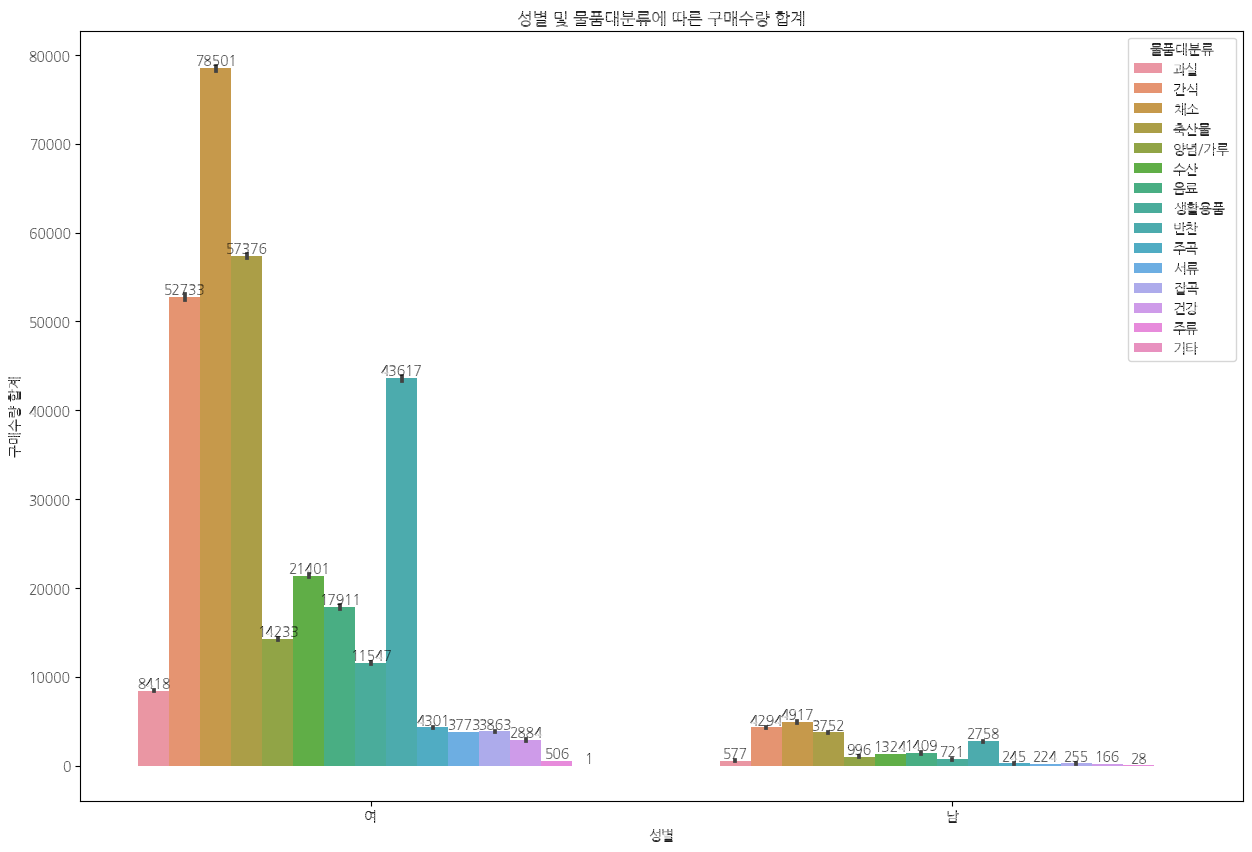

In [75]:
plt.figure(figsize=(15, 10))

# 물품대분류와 성별에 따른 물품구매건수의 합계를 시각화
p1 = sns.barplot(x='성별', y='구매수량', hue='물품대분류', data=data, estimator=sum)

# 각 막대 위에 구매 건수 합계 표시
for p in p1.patches:
    height = p.get_height()  # 각 막대의 높이(물품구매건수의 합계)
    if height > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p1.annotate(f'{int(height)}',  # 정수 형태로 표시
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

plt.title('성별 및 물품대분류에 따른 구매수량 합계')
plt.xlabel('성별')
plt.ylabel('구매수량 합계')
plt.legend(title='물품대분류')
plt.show()





    가장 높은 구매 빈도: 여성은 채소와 축산물을 가장 많이 구매

    음료, 주곡, 서류 등은 상대적으로 낮은 구매 빈도를 보임

    남성은 대부분의 품목에서 낮은 구매 빈도를 보이며, 축산물(2,999)이 상대적으로 많이 구매

    주류, 건강 제품, 주곡 등 일부 품목의 구매 빈도는 매우 낮음



<Figure size 1500x1000 with 0 Axes>

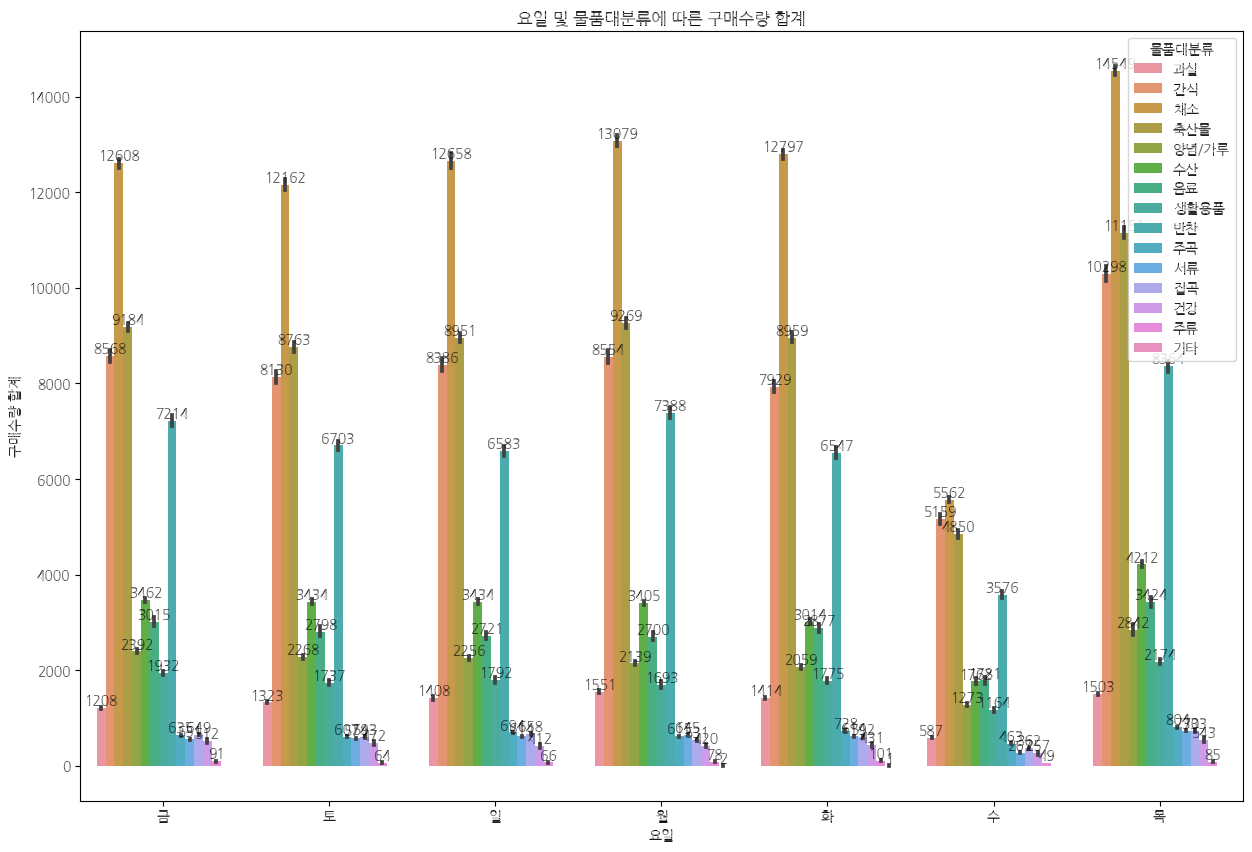

In [76]:


plt.figure(figsize=(15, 10))

plt.figure(figsize=(15, 10))

# 물품대분류와 평일/주말에 따른 구매수량의 합계를 시각화
p1 = sns.barplot(x='요일', y='구매수량', hue='물품대분류', data=data, estimator=sum)

# 각 막대 위에 구매 건수 합계 표시
for p in p1.patches:
    height = p.get_height()  # 각 막대의 높이(물품구매건수의 합계)
    if height > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p1.annotate(f'{int(height)}',  # 정수 형태로 표시
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

plt.title('요일 및 물품대분류에 따른 구매수량 합계')
plt.xlabel('요일')
plt.ylabel('구매수량 합계')
plt.legend(title='물품대분류')
plt.show()



<Figure size 1500x1000 with 0 Axes>

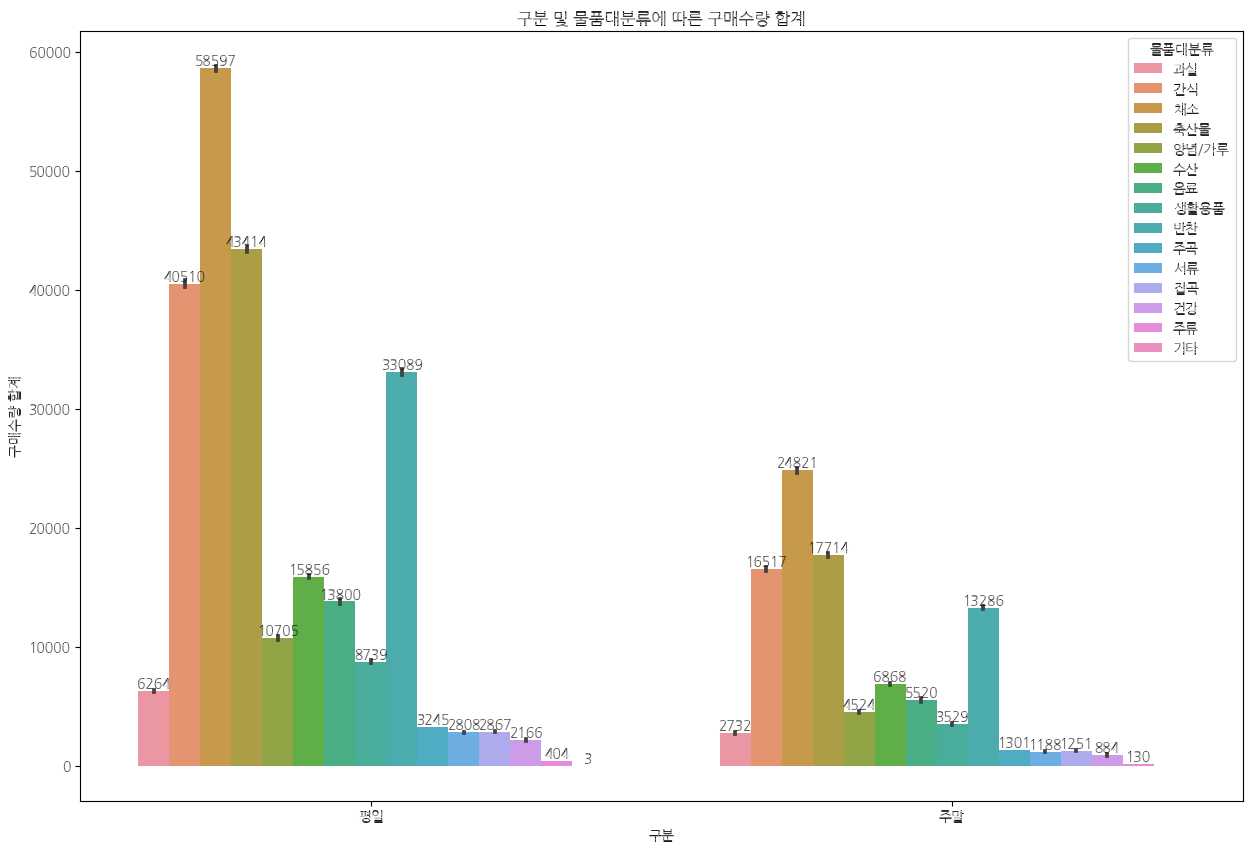

In [77]:
plt.figure(figsize=(15, 10))

data['구분'] = data['요일'].apply(lambda x: '평일' if x in ['월', '화', '수', '목', '금'] else '주말')

plt.figure(figsize=(15, 10))

# 물품대분류와 평일/주말에 따른 구매수량의 합계를 시각화
p1 = sns.barplot(x='구분', y='구매수량', hue='물품대분류', data=data, estimator=sum)

# 각 막대 위에 구매 건수 합계 표시
for p in p1.patches:
    height = p.get_height()  # 각 막대의 높이(물품구매건수의 합계)
    if height > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p1.annotate(f'{int(height)}',  # 정수 형태로 표시
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

plt.title('구분 및 물품대분류에 따른 구매수량 합계')
plt.xlabel('구분')
plt.ylabel('구매수량 합계')
plt.legend(title='물품대분류')
plt.show()




    채소와 축산물: 이 두 품목은 평일과 주말 모두에서 높은 소비량을 보이며, 주말보다 평일에 더 많이 구매됩니다. 이는 일상적으로 꾸준히 소비되는 품목 임을 나타냅니다.

    생활용품: 평일과 주말 모두 일정한 수요가 있으며, 특히 평일에 많이 구매되는 경향이 있습니다.

    음료와 간식: 주말에도 구매가 활발하게 이루어지는 품목으로, 이는 여가 활동과 관련된 소비 패턴을 반영



<Figure size 1500x1000 with 0 Axes>

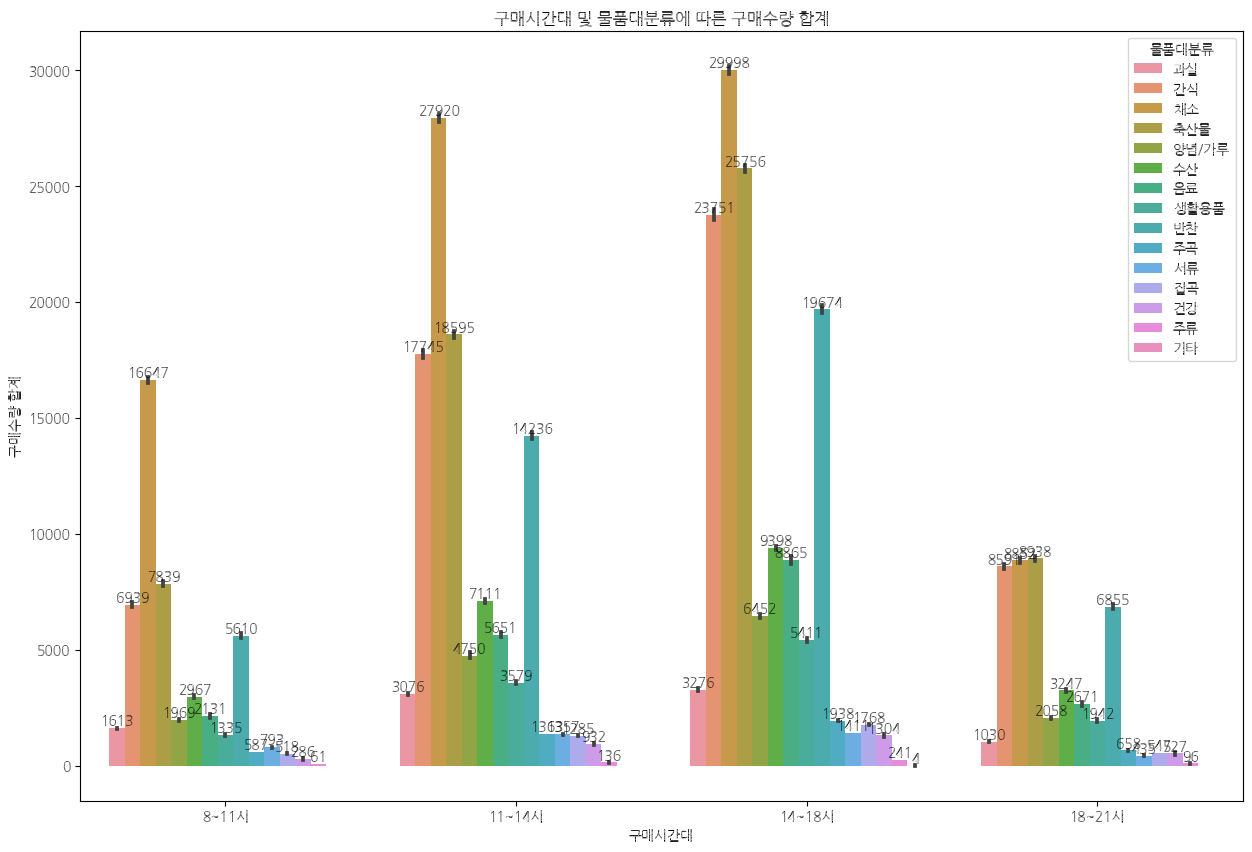

In [78]:


plt.figure(figsize=(15, 10))

plt.figure(figsize=(15, 10))

# 물품대분류와 시간대에 따른 구매수량의 합계를 시각화
p1 = sns.barplot(x='구매시간대', y='구매수량', hue='물품대분류', data=data, estimator=sum)

# 각 막대 위에 구매 건수 합계 표시
for p in p1.patches:
    height = p.get_height()  # 각 막대의 높이(물품구매건수의 합계)
    if height > 0:  # 높이가 0보다 큰 경우에만 레이블 표시
        p1.annotate(f'{int(height)}',  # 정수 형태로 표시
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

plt.title('구매시간대 및 물품대분류에 따른 구매수량 합계')
plt.xlabel('구매시간대')
plt.ylabel('구매수량 합계')
plt.legend(title='물품대분류')
plt.show()





    주요 쇼핑 시간대: 11~18시가 가장 활발한 구매 시간대로, 이 시간대에는 채소, 축산물, 생활용품, 과실 등의 필수 소비품목이 많이 구매

    아침 시간대(8~11시): 주로 채소, 축산물 등 식재료 중심의 소비가 이루어지며, 아침 식사나 장보기와 관련된 소비

    저녁 시간대(18~21시): 구매 빈도가 낮지만 채소, 과실, 생활용품 등의 필수 품목 구매가 꾸준히 존재



배송서비스신청여부       미신청       신청
조합원상태                       
정상회원       231700.0  54039.0
탈퇴           2770.0    323.0
탈퇴신청            5.0      0.0
탈퇴처리중          52.0      0.0


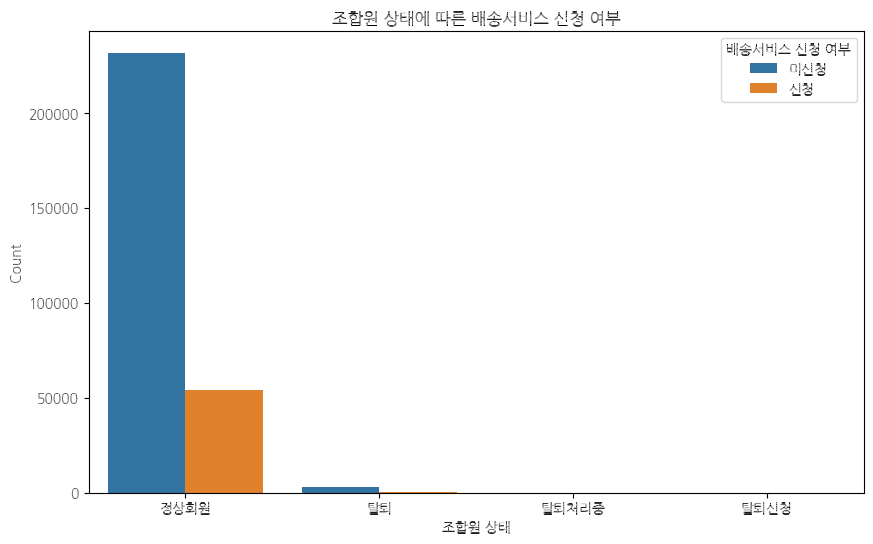

In [79]:
import pandas as pd

# '조합원상태'와 '배송서비스신청여부'별로 데이터 요약
status_delivery_summary = data.groupby(['조합원상태', '배송서비스신청여부']).size().unstack().fillna(0)
print(status_delivery_summary)

import seaborn as sns
import matplotlib.pyplot as plt

# 탈퇴 여부와 배송서비스 신청여부 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='조합원상태', hue='배송서비스신청여부', data=data)
plt.title('조합원 상태에 따른 배송서비스 신청 여부')
plt.xlabel('조합원 상태')
plt.ylabel('Count')
plt.legend(title='배송서비스 신청 여부')
plt.show()

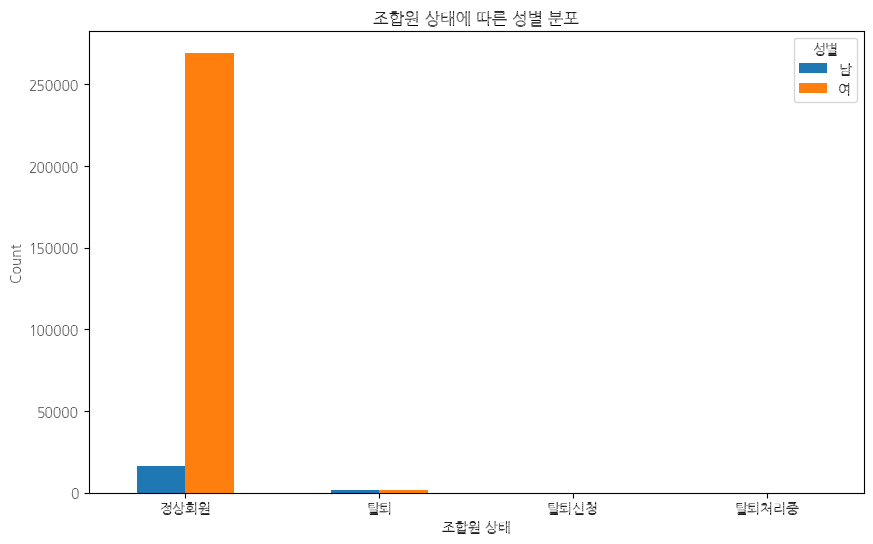

In [80]:
count_data = data.groupby(['조합원상태', '성별']).size().unstack()

# 그래프 생성
count_data.plot(kind='bar', figsize=(10, 6))

# 제목과 축 레이블 설정
plt.title('조합원 상태에 따른 성별 분포')
plt.xlabel('조합원 상태')
plt.ylabel('Count')
plt.legend(title='성별')
plt.xticks(rotation=0)
plt.show()


모바일알람여부       미수신       수신
조합원상태                     
정상회원     212481.0  73258.0
탈퇴         1364.0   1729.0
탈퇴신청          5.0      NaN
탈퇴처리중        52.0      NaN


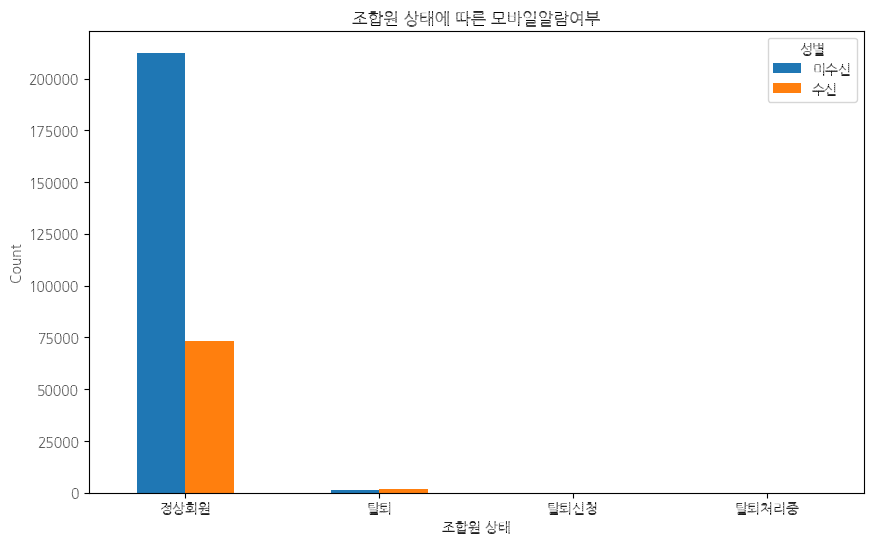

In [82]:
count_data = data.groupby(['조합원상태', '모바일알람여부']).size().unstack()
print(count_data)

# 그래프 생성
count_data.plot(kind='bar', figsize=(10, 6))

# 제목과 축 레이블 설정
plt.title('조합원 상태에 따른 모바일알람여부')
plt.xlabel('조합원 상태')
plt.ylabel('Count')
plt.legend(title='성별')
plt.xticks(rotation=0)
plt.show()

In [84]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# 등급별 배송서비스/알람서비스 신청여부

In [85]:


data1=pd.read_csv("/home/piai/RFM_member.csv",encoding='euc-kr')
data1.head()



,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,주소대분류,주소소분류,프로모션여부,...,R_score,M_score,F_score,RFM_score,RFM_rank,주매장,이탈여부,최소재구매주기,재구매여부,5개월이내재구매
0,1127956160,정상회원,여,43,미신청,미수신,normal,용인 수지구,죽전동,0,...,1,1,1,1.0,포미방문자,매장C,잠재이탈,0.0,0,0
1,848958528,정상회원,여,46,미신청,수신,normal,성남 분당구,구미동,0,...,4,1,1,1.9,포미방문자,매장B,정상,0.0,0,0
2,975105280,정상회원,남,40,미신청,미수신,normal,용인 기흥구,신갈동,0,...,1,1,1,1.0,포미방문자,매장B,잠재이탈,0.0,0,0
3,96200192,정상회원,여,48,미신청,미수신,normal,용인 수지구,상현동,0,...,3,1,1,1.6,포미방문자,매장D,정상,0.0,0,0
4,715408192,정상회원,여,38,미신청,미수신,normal,서울 강남구,기타,0,...,1,1,1,1.0,포미방문자,매장C,잠재이탈,0.0,0,0


In [86]:


# 'RFM_rank'와 '배송서비스신청여부'의 카이제곱 검정
contingency_table1 = pd.crosstab(data1['RFM_rank'], data1['배송서비스신청여부'])
chi2_1, p_value1, _, _ = chi2_contingency(contingency_table1)
print("RFM_rank와 배송서비스신청여부 간의 카이제곱 검정 결과")
print("카이제곱 통계량:", chi2_1)
print("p-value:", p_value1)

# 'RFM_rank'와 '모바일알람여부'의 카이제곱 검정
contingency_table2 = pd.crosstab(data1['RFM_rank'], data1['모바일알람여부'])
chi2_2, p_value2, _, _ = chi2_contingency(contingency_table2)
print("\nRFM_rank와 모바일알람여부 간의 카이제곱 검정 결과")
print("카이제곱 통계량:", chi2_2)
print("p-value:", p_value2)



RFM_rank와 배송서비스신청여부 간의 카이제곱 검정 결과
카이제곱 통계량: 2367.508370227602
p-value: 0.0

RFM_rank와 모바일알람여부 간의 카이제곱 검정 결과
카이제곱 통계량: 1961.7017279523259
p-value: 0.0


In [93]:
data = pd.read_csv("RFM_member.csv", encoding='euc-kr')
data.head()

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,주소대분류,주소소분류,프로모션여부,...,R_score,M_score,F_score,RFM_score,RFM_rank,주매장,이탈여부,최소재구매주기,재구매여부,5개월이내재구매
0,1127956160,정상회원,여,43,미신청,미수신,normal,용인 수지구,죽전동,0,...,1,1,1,1.0,포미방문자,매장C,잠재이탈,0.0,0,0
1,848958528,정상회원,여,46,미신청,수신,normal,성남 분당구,구미동,0,...,4,1,1,1.9,포미방문자,매장B,정상,0.0,0,0
2,975105280,정상회원,남,40,미신청,미수신,normal,용인 기흥구,신갈동,0,...,1,1,1,1.0,포미방문자,매장B,잠재이탈,0.0,0,0
3,96200192,정상회원,여,48,미신청,미수신,normal,용인 수지구,상현동,0,...,3,1,1,1.6,포미방문자,매장D,정상,0.0,0,0
4,715408192,정상회원,여,38,미신청,미수신,normal,서울 강남구,기타,0,...,1,1,1,1.0,포미방문자,매장C,잠재이탈,0.0,0,0


# 증정품 증정과 재구매 여부와의 관계 검증

In [94]:
# 1. 교차표 생성
contingency_table = pd.crosstab(data['재구매여부'], data['프로모션여부'])

# 2. chi-square test 실행
chi, pval, dof, expected = chi2_contingency(contingency_table)

# 3. 결과 출력
print("chi-square test")
print(f"Chi-squared: {chi:.2f}")
print(f"p-value: {pval:.3f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:\n", expected.round(1))

chi-square test
Chi-squared: 155.37
p-value: 0.000
Degrees of freedom: 1
Expected values:
 [[4759.4  147.6]
 [6433.6  199.4]]


# 배송서비스 신청여부와 재구매 여부와의 관계 검증

In [95]:


# 1. 교차표 생성
contingency_table = pd.crosstab(data['배송서비스신청여부'], data['재구매여부'])

# 2. chi-square test 실행
chi, pval, dof, expected = chi2_contingency(contingency_table)

# 3. 결과 출력
print("chi-square test")
print(f"Chi-squared: {chi:.2f}")
print(f"p-value: {pval:.3f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:\n", expected.round(1))



chi-square test
Chi-squared: 831.14
p-value: 0.000
Degrees of freedom: 1
Expected values:
 [[4463.5 6033.5]
 [ 443.5  599.5]]


# 모바일알람서비스 신청여부와 재구매 여부와의 관계 검증


In [96]:
# 1. 교차표 생성
contingency_table = pd.crosstab(data['모바일알람여부'], data['재구매여부'])

# 2. chi-square test 실행
chi, pval, dof, expected = chi2_contingency(contingency_table)

# 3. 결과 출력
print("chi-square test")
print(f"Chi-squared: {chi:.2f}")
print(f"p-value: {pval:.3f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:\n", expected.round(1))

chi-square test
Chi-squared: 48.88
p-value: 0.000
Degrees of freedom: 1
Expected values:
 [[4523.9 6115.1]
 [ 383.1  517.9]]


In [97]:
import pandas as pd
# 데이터 로드
df1= pd.read_csv("/home/piai/RFM_product.csv", encoding='euc-kr')
df2=pd.read_csv("/home/piai/RFM_member.csv", encoding='euc-kr')
merged_data = pd.merge(df1, df2, on='회원번호', how='inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288889 entries, 0 to 288888
Data columns (total 51 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   회원번호           288889 non-null  int64  
 1   조합원상태_x        288889 non-null  object 
 2   물품대분류          288889 non-null  object 
 3   물품중분류          288889 non-null  object 
 4   물품소분류          288889 non-null  object 
 5   물품명            288889 non-null  object 
 6   구매수량           288889 non-null  float64
 7   구매금액           288889 non-null  float64
 8   구매매장           288889 non-null  object 
 9   구매시각           288889 non-null  object 
 10  공급년도           288889 non-null  int64  
 11  공급월            288889 non-null  int64  
 12  공급일            288889 non-null  int64  
 13  성별_x           288889 non-null  object 
 14  연령_x           288889 non-null  float64
 15  배송서비스신청여부_x    288889 non-null  object 
 16  모바일알람여부_x      288889 non-null  object 
 17  Gold_member_x  288889 non-nul

In [98]:


# 포미킹 등급의 데이터 필터링
fomi_king_data = merged_data[merged_data['RFM_rank'] == '포미킹']

# 배송서비스 미신청과 신청에 따른 평균 구매 금액 및 구매 수량 비교
summary = fomi_king_data.groupby('배송서비스신청여부_y').agg({
    '구매금액': 'mean',
    '구매수량': 'mean'
}).rename(columns={'구매금액': '평균 구매금액', '구매수량': '평균 구매수량'})

# 배송서비스 미신청과 신청에 따른 연령대 분포 계산
age_distribution = fomi_king_data.groupby(['배송서비스신청여부_y', '연령대_x']).size().unstack(fill_value=0)

# 결과 출력
print("포미킹 등급의 배송서비스신청여부에 따른 구매 특성:")
summary
print("\n포미킹 등급의 배송서비스신청여부에 따른 연령대 분포:")
age_distribution



포미킹 등급의 배송서비스신청여부에 따른 구매 특성:

포미킹 등급의 배송서비스신청여부에 따른 연령대 분포:


연령대_x,30대,40대,50대,60대,70대,80대,90대이상
배송서비스신청여부_y,,,,,,,
미신청,10033,34863,28573,12142,8389,651,247
신청,136,127,104,0,0,0,0


In [99]:
# 포미킹 등급의 데이터 필터링
fomi_king_data = merged_data[merged_data['RFM_rank'] == '포미킹']

# 배송서비스 미신청과 신청에 따른 평균 구매 금액 및 구매 수량 비교
summary = fomi_king_data.groupby('모바일알람여부_y').agg({
    '구매금액': 'mean',
    '구매수량': 'mean'
}).rename(columns={'구매금액': '평균 구매금액', '구매수량': '평균 구매수량'})

# 배송서비스 미신청과 신청에 따른 연령대 분포 계산
age_distribution = fomi_king_data.groupby(['모바일알람여부_y', '연령대_x']).size().unstack(fill_value=0)

# 결과 출력
print("포미킹 등급의 배송서비스신청여부에 따른 구매 특성:")
summary
print("\n포미킹 등급의 배송서비스신청여부에 따른 연령대 분포:")
age_distribution


포미킹 등급의 배송서비스신청여부에 따른 구매 특성:

포미킹 등급의 배송서비스신청여부에 따른 연령대 분포:


연령대_x,30대,40대,50대,60대,70대,80대,90대이상
모바일알람여부_y,,,,,,,
미수신,2390,7477,7521,11080,7566,651,247
수신,7779,27513,21156,1062,823,0,0


In [100]:
# 포미킹 등급의 데이터 필터링
fomi_king_data = merged_data[merged_data['RFM_rank'] == '포미킹']

# 배송서비스신청여부가 신청과 미신청인 사람들의 주매장 분포 확인
store_distribution = fomi_king_data.groupby(['배송서비스신청여부_y', '주매장']).size().unstack(fill_value=0)

# 결과 출력
print("포미킹 등급에서 배송서비스신청 여부에 따른 주매장 분포:")
store_distribution


포미킹 등급에서 배송서비스신청 여부에 따른 주매장 분포:


주매장,매장A,매장B,매장C,매장D
배송서비스신청여부_y,,,,
미신청,16498,17341,42907,18152
신청,127,240,0,0


In [101]:
# 포미킹 등급의 데이터 필터링
fomi_king_data = merged_data[merged_data['RFM_rank'] == '포미킹']

# 배송서비스신청여부가 신청과 미신청인 사람들의 주매장 분포 확인
store_distribution = fomi_king_data.groupby(['배송서비스신청여부_y', '주소소분류_x']).size().unstack(fill_value=0)

# 결과 출력
print("포미킹 등급에서 배송서비스신청 여부에 따른 주소 분포:")
store_distribution


포미킹 등급에서 배송서비스신청 여부에 따른 주소 분포:


주소소분류_x,구미동,기타,동천동,백현동,보정동,상현동,서현동,성복동,수내동,신갈동,신봉동,영덕동,이매동,정자동,죽전동,중동,판교동,풍덕천동
배송서비스신청여부_y,,,,,,,,,,,,,,,,,,
미신청,312,3694,10645,115,1215,13452,230,6937,379,174,16280,312,153,757,458,250,112,39423
신청,0,0,127,0,0,240,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:


# 회원번호와 구매날짜가 같은 경우 구매수량을 합산하여 1회구매수량으로 정의
merged_data['1회구매수량'] = merged_data.groupby(['회원번호', '날짜'])['구매수량'].transform('sum')

# 모든 RFM 등급에서 배송서비스신청여부에 따른 1회구매수량 평균 계산
avg_single_purchase_quantity_by_rank_service = merged_data.groupby(['RFM_rank', '배송서비스신청여부_y'])['1회구매수량'].mean().reset_index()

# 결과 출력
print("모든 RFM 등급에서 배송서비스신청 여부에 따른 1회구매수량 평균:")
avg_single_purchase_quantity_by_rank_service



모든 RFM 등급에서 배송서비스신청 여부에 따른 1회구매수량 평균:


,RFM_rank,배송서비스신청여부_y,1회구매수량
0,포미방문자,미신청,2.806665
1,포미방문자,신청,4.505000
2,포미초대손님,미신청,2.675981
3,포미초대손님,신청,4.597099
4,포미킹,미신청,3.958328
5,포미킹,신청,4.534060
6,포미패밀리,미신청,3.044950
7,포미패밀리,신청,3.887853
8,포미프렌즈,미신청,2.592286
9,포미프렌즈,신청,3.649252


In [106]:
# 매장 C와 D에 다니는 포미킹 등급의 데이터를 필터링
fomi_king_cd_data = merged_data[(merged_data['RFM_rank'] == '포미킹') & 
                                (merged_data['주매장'].isin(['매장A', '매장B']))]

# 배송서비스 신청 여부에 따라 1회 구매수량 평균 계산
fomi_king_cd_avg_purchase_quantity = fomi_king_cd_data.groupby('배송서비스신청여부_y')['1회구매수량'].mean()

# 결과 출력
print("매장 C와 D의 포미킹 등급에서 배송서비스신청 여부에 따른 1회 구매수량 평균:")
fomi_king_cd_avg_purchase_quantity

매장 C와 D의 포미킹 등급에서 배송서비스신청 여부에 따른 1회 구매수량 평균:


배송서비스신청여부_y
미신청    4.111483
신청     4.534060
Name: 1회구매수량, dtype: float64

In [107]:
# 포미킹 등급 중에서 60대, 70대, 80대, 90대 이상인 고객들의 데이터를 필터링
fomi_king_age_data = df2[(df2['RFM_rank'] == '포미킹') & 
                                 (df2['연령대'].isin(['60대', '70대', '80대', '90대이상']))]

# 해당 고객들의 구매 매장 분포 확인
fomi_king_store_distribution = fomi_king_age_data['주매장'].value_counts()

# 결과 출력
print("포미킹 등급의 60대, 70대, 80대, 90대 이상 고객들의 구매 매장 분포:")
fomi_king_store_distribution


포미킹 등급의 60대, 70대, 80대, 90대 이상 고객들의 구매 매장 분포:


매장C    49
매장D    43
매장B    26
매장A    26
Name: 주매장, dtype: int64

In [110]:
purchase_analysis = merged_data.groupby(['RFM_rank', '배송서비스신청여부_y'])['구매금액'].agg(['mean', 'sum', 'count'])
purchase_analysis


mean           sum  count
RFM_rank 배송서비스신청여부_y                                   
포미방문자    미신청          12754.619825  1.765367e+08  13841
         신청           11831.414286  1.656398e+06    140
포미초대손님   미신청          10731.931511  3.959224e+08  36892
         신청           14363.341691  2.005122e+07   1396
포미킹      미신청          12160.462325  1.154004e+09  94898
         신청            9811.765668  3.600918e+06    367
포미패밀리    미신청          10764.786964  5.641717e+08  52409
         신청           12223.849918  2.982619e+08  24400
포미프렌즈    미신청          10542.364568  3.846593e+08  36487
         신청           11935.380270  3.348948e+08  28059

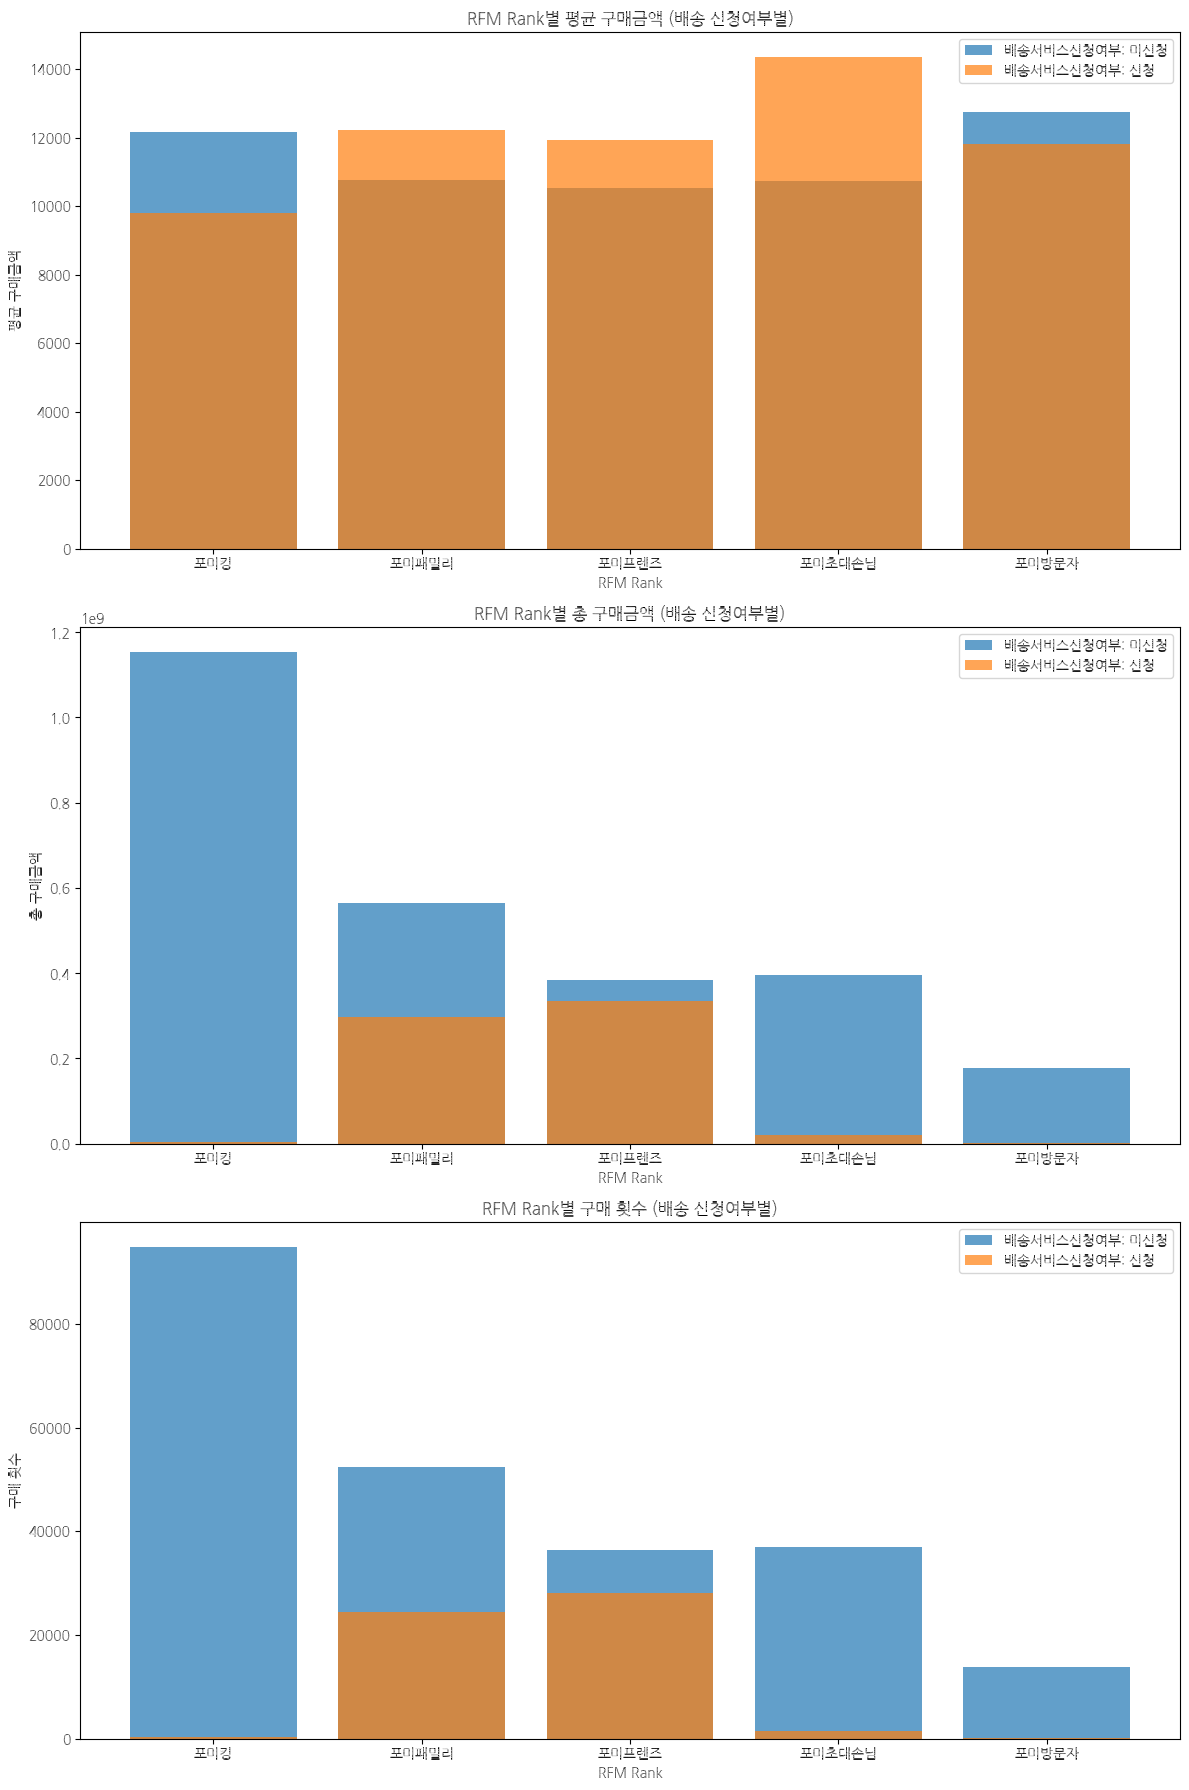

In [111]:
import matplotlib.pyplot as plt

# RFM 등급 순서 지정
rank_order = ['포미킹', '포미패밀리', '포미프렌즈', '포미초대손님', '포미방문자']
purchase_analysis = purchase_analysis.reindex(rank_order, level=0)

# 그래프 생성
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# RFM Rank별 평균 구매금액 그래프 (배송 신청여부별)
for status in purchase_analysis.index.get_level_values(1).unique():
    subset = purchase_analysis.xs(status, level=1)
    axes[0].bar(subset.index, subset['mean'], label=f'배송서비스신청여부: {status}', alpha=0.7)

axes[0].set_title('RFM Rank별 평균 구매금액 (배송 신청여부별)')
axes[0].set_xlabel('RFM Rank')
axes[0].set_ylabel('평균 구매금액')
axes[0].legend()

# RFM Rank별 총 구매금액 그래프 (배송 신청여부별)
for status in purchase_analysis.index.get_level_values(1).unique():
    subset = purchase_analysis.xs(status, level=1)
    axes[1].bar(subset.index, subset['sum'], label=f'배송서비스신청여부: {status}', alpha=0.7)

axes[1].set_title('RFM Rank별 총 구매금액 (배송 신청여부별)')
axes[1].set_xlabel('RFM Rank')
axes[1].set_ylabel('총 구매금액')
axes[1].legend()

# RFM Rank별 구매 횟수 그래프 (배송 신청여부별)
for status in purchase_analysis.index.get_level_values(1).unique():
    subset = purchase_analysis.xs(status, level=1)
    axes[2].bar(subset.index, subset['count'], label=f'배송서비스신청여부: {status}', alpha=0.7)

axes[2].set_title('RFM Rank별 구매 횟수 (배송 신청여부별)')
axes[2].set_xlabel('RFM Rank')
axes[2].set_ylabel('구매 횟수')
axes[2].legend()

# 그래프 출력
plt.tight_layout()
plt.show()

In [112]:
# 포미킹 등급의 데이터 필터링
fomi_king_data = merged_data[merged_data['RFM_rank'] == '포미패밀리']

# 배송서비스신청여부가 신청과 미신청인 사람들의 주매장 분포 확인
store_distribution = fomi_king_data.groupby(['배송서비스신청여부_y', '주매장']).size().unstack(fill_value=0)

# 결과 출력
print("포미킹 등급에서 배송서비스신청 여부에 따른 주매장 분포:")
store_distribution

포미킹 등급에서 배송서비스신청 여부에 따른 주매장 분포:


주매장,매장A,매장B,매장C,매장D
배송서비스신청여부_y,,,,
미신청,8538,7746,26321,9804
신청,5175,7839,7497,3889


In [113]:


# 포미킹 등급이면서 주매장이 매장A인 사람들의 주소소분류_x 분포 확인
address_distribution = merged_data[(merged_data['RFM_rank'] == '포미킹') & (merged_data['주매장'] == '매장A')]['주소소분류_x'].value_counts()

# 결과 출력
print("포미킹 등급, 주매장이 매장A인 사람들의 주소소분류_x 분포:")
print(address_distribution)



포미킹 등급, 주매장이 매장A인 사람들의 주소소분류_x 분포:
동천동     10270
풍덕천동     4239
상현동       321
신봉동       271
기타        270
보정동       235
죽전동       234
서현동       230
수내동       162
정자동       147
성복동       134
판교동       112
Name: 주소소분류_x, dtype: int64


In [114]:
# 포미킹 등급이면서 주매장이 매장B인 사람들의 주소소분류_x 분포 확인
address_distribution = merged_data[(merged_data['RFM_rank'] == '포미킹') & (merged_data['주매장'] == '매장B')]['주소소분류_x'].value_counts()

# 결과 출력
print("포미킹 등급, 주매장이 매장B인 사람들의 주소소분류_x 분포:")
print(address_distribution)


포미킹 등급, 주매장이 매장B인 사람들의 주소소분류_x 분포:
상현동     10744
풍덕천동     4001
성복동      1316
보정동       818
기타        208
이매동       153
구미동       143
수내동       112
죽전동        86
Name: 주소소분류_x, dtype: int64


In [115]:
# 포미킹 등급이면서 주매장이 매장C인 사람들의 주소소분류_x 분포 확인
address_distribution = merged_data[(merged_data['RFM_rank'] == '포미킹') & (merged_data['주매장'] == '매장C')]['주소소분류_x'].value_counts()

# 결과 출력
print("포미킹 등급, 주매장이 매장C인 사람들의 주소소분류_x 분포:")
print(address_distribution)

포미킹 등급, 주매장이 매장C인 사람들의 주소소분류_x 분포:
풍덕천동    31023
성복동      3110
상현동      2379
기타       2371
신봉동      1961
정자동       511
동천동       502
영덕동       312
신갈동       174
구미동       169
보정동       162
중동        118
백현동       115
Name: 주소소분류_x, dtype: int64


In [116]:


# 포미킹 등급이면서 주매장이 매장C인 사람들의 주소소분류_x 분포 확인
address_distribution = merged_data[(merged_data['RFM_rank'] == '포미킹') & (merged_data['주매장'] == '매장D')]['주소소분류_x'].value_counts()

# 결과 출력
print("포미킹 등급, 주매장이 매장D인 사람들의 주소소분류_x 분포:")
print(address_distribution)



포미킹 등급, 주매장이 매장D인 사람들의 주소소분류_x 분포:
신봉동     14048
성복동      2377
기타        845
상현동       248
풍덕천동      160
죽전동       138
중동        132
수내동       105
정자동        99
Name: 주소소분류_x, dtype: int64


In [117]:
# 연령대_x에 따른 주매장 분포 확인
store_distribution_by_age = df2.groupby(['연령대', '주매장']).size().unstack(fill_value=0)

# 결과 출력
print("연령대_x에 따른 주매장 분포:")
store_distribution_by_age


연령대_x에 따른 주매장 분포:


주매장,매장A,매장B,매장C,매장D
연령대,,,,
10대,1,0,0,0
20대,16,11,17,8
30대,443,621,800,271
40대,889,1189,1690,707
50대,470,585,1061,427
60대,252,354,483,364
70대,86,173,257,219
80대,12,28,60,36
90대이상,1,2,5,2


In [118]:
# 포미킹 등급이고 연령대_x가 60대, 70대, 80대, 90대이상인 고객의 주매장 분포 확인
age_groups = ['60대', '70대', '80대', '90대이상']
fomi_king_age_distribution = df2[(df2['RFM_rank'] == '포미킹') & 
                                         (df2['연령대'].isin(age_groups))]

store_distribution = fomi_king_age_distribution['주매장'].value_counts()

# 결과 출력
print("포미킹 등급이고 연령대가 60대, 70대, 80대, 90대이상인 고객의 주매장 분포:")
store_distribution

포미킹 등급이고 연령대가 60대, 70대, 80대, 90대이상인 고객의 주매장 분포:


매장C    49
매장D    43
매장B    26
매장A    26
Name: 주매장, dtype: int64

In [120]:
# 멤버 데이터에서 연령대_x가 10대인 행 필터링
teen_members = df2[df2['연령대'] == '10대']

# 결과 출력
print("연령대가 10대인 멤버 데이터:")
teen_members


연령대가 10대인 멤버 데이터:


,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,주소대분류,주소소분류,프로모션여부,...,R_score,M_score,F_score,RFM_score,RFM_rank,주매장,이탈여부,최소재구매주기,재구매여부,5개월이내재구매
8856,1575020160,정상회원,여,17,미신청,미수신,normal,용인 수지구,풍덕천동,0,...,5,2,3,3.3,포미패밀리,매장A,정상,1.0,1,1


In [121]:


# 조합원상태가 '탈퇴'인 사람들의 주매장 분포 확인
withdrawn_members_store_distribution = df2[df2['조합원상태'] == '탈퇴']['주매장'].value_counts()

# 결과 출력
print("조합원상태가 '탈퇴'인 사람들의 주매장 분포:")
print(withdrawn_members_store_distribution)



조합원상태가 '탈퇴'인 사람들의 주매장 분포:
매장C    55
매장B    35
매장D    33
매장A    19
Name: 주매장, dtype: int64


In [122]:


# 주매장별로 '정상'과 '탈퇴' 상태의 회원 수를 집계
membership_status_counts = df2.groupby(['주매장', '조합원상태'])['회원번호'].nunique().unstack(fill_value=0)

# 탈퇴 비율 계산: 탈퇴 회원 수 / (정상 + 탈퇴 회원 수)
membership_status_counts['탈퇴 비율'] = membership_status_counts['탈퇴'] / (membership_status_counts['탈퇴'] + membership_status_counts['정상회원']) * 100

# 결과 출력
print("주매장별 정상+탈퇴 회원 수 대비 탈퇴 회원 수 비율:")
membership_status_counts[['정상회원', '탈퇴', '탈퇴 비율']]



주매장별 정상+탈퇴 회원 수 대비 탈퇴 회원 수 비율:


조합원상태,정상회원,탈퇴,탈퇴 비율
주매장,,,
매장A,2151,19,0.875576
매장B,2928,35,1.181235
매장C,4318,55,1.257718
매장D,2001,33,1.622419


In [124]:


# 각 주매장별로 주소소분류_x 분포를 구하고 상위 5개씩 표시
top5_address_distribution = df2.groupby('주매장')['주소소분류'].value_counts().groupby(level=0).head(5)

# 결과 출력
print("주매장별 주소소분류_x 상위 5개 분포:")
top5_address_distribution



주매장별 주소소분류_x 상위 5개 분포:


주매장  주소소분류
매장A  동천동       867
     기타        484
     풍덕천동      266
     죽전동        65
     정자동        44
매장B  상현동      1347
     기타        469
     풍덕천동      426
     보정동       182
     성복동       175
매장C  풍덕천동     2440
     기타        629
     성복동       286
     상현동       183
     신봉동       181
매장D  신봉동      1162
     기타        337
     성복동       232
     풍덕천동       54
     상현동        40
Name: 주소소분류, dtype: int64

In [125]:
# 각 주매장별로 등급이 포미킹과 포미방문자인 회원의 비율 계산
rank_counts = df2[df2['RFM_rank'].isin(['포미킹', '포미방문자'])].groupby(['주매장', 'RFM_rank'])['회원번호'].nunique().unstack(fill_value=0)

# 각 주매장별 포미킹과 포미방문자의 비율 계산
rank_counts['포미킹 비율'] = (rank_counts['포미킹'] / (rank_counts['포미킹'] + rank_counts['포미방문자'])) * 100
rank_counts['포미방문자 비율'] = (rank_counts['포미방문자'] / (rank_counts['포미킹'] + rank_counts['포미방문자'])) * 100

# 결과 출력
print("각 주매장별 포미킹과 포미방문자의 비율:")
rank_counts[['포미킹 비율', '포미방문자 비율']]


각 주매장별 포미킹과 포미방문자의 비율:


RFM_rank,포미킹 비율,포미방문자 비율
주매장,,
매장A,10.337553,89.662447
매장B,9.098428,90.901572
매장C,15.628816,84.371184
매장D,13.763703,86.236297


In [126]:


# 프로모션 여부에 따른 R 값의 평균 계산
promotion_r_mean = df2.groupby('프로모션여부')['R'].mean()

# 결과 출력
print("프로모션 여부가 1인 사람들의 R 평균:", promotion_r_mean[1])
print("프로모션 여부가 0인 사람들의 R 평균:", promotion_r_mean[0])



프로모션 여부가 1인 사람들의 R 평균: 20.236311239193082
프로모션 여부가 0인 사람들의 R 평균: 76.6237827213437


In [127]:
# 프로모션 여부에 따른 F 값의 평균 계산
promotion_r_mean = df2.groupby('프로모션여부')['F_score'].mean()

# 결과 출력
print("프로모션 여부가 1인 사람들의 F 평균:", promotion_r_mean[1])
print("프로모션 여부가 0인 사람들의 F 평균:", promotion_r_mean[0])

프로모션 여부가 1인 사람들의 F 평균: 3.1440922190201728
프로모션 여부가 0인 사람들의 F 평균: 2.079871348164031


In [128]:


# 프로모션 여부에 따른 F 값의 평균 계산
promotion_r_mean = df2.groupby('프로모션여부')['RFM_score'].mean()

# 결과 출력
print("프로모션 여부가 1인 사람들의 RFM score 평균:", promotion_r_mean[1])
print("프로모션 여부가 0인 사람들의 RFM score 평균:", promotion_r_mean[0])



프로모션 여부가 1인 사람들의 RFM score 평균: 3.3939481268011527
프로모션 여부가 0인 사람들의 RFM score 평균: 2.3008844813722864


In [132]:
rfm_rank_재구매율 = data.groupby('RFM_rank')['재구매여부'].mean() * 100  # 퍼센트로 표시

# 결과 출력
print(rfm_rank_재구매율)

RFM_rank
포미방문자      17.454816
포미초대손님     63.171577
포미킹       100.000000
포미패밀리     100.000000
포미프렌즈      87.088388
Name: 재구매여부, dtype: float64


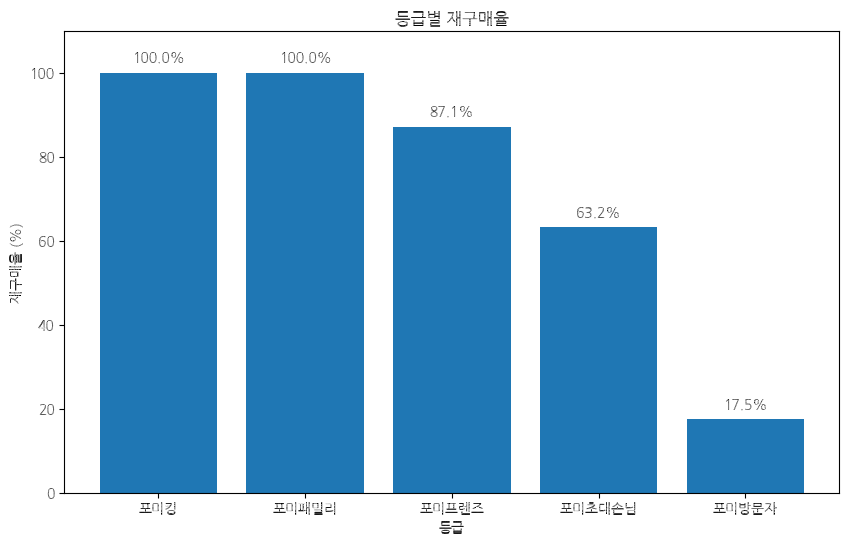

In [134]:
rfm_rank_재구매율 = {
    '포미방문자': 17.454816,
    '포미초대손님': 63.171577,
    '포미킹': 100.0,
    '포미패밀리': 100.0,
    '포미프렌즈': 87.088388
}

# 원하는 순서로 정렬
sorted_ranks = ['포미킹', '포미패밀리', '포미프렌즈','포미초대손님', '포미방문자']
sorted_rates = [rfm_rank_재구매율[rank] for rank in sorted_ranks]

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(sorted_ranks, sorted_rates)
plt.xlabel('등급')
plt.ylabel('재구매율 (%)')
plt.title('등급별 재구매율')
plt.ylim(0, 110)  # y축을 0~100% 이상으로 설정해 여백을 줌

# 값 표시
for i, rate in enumerate(sorted_rates):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom')

# 그래프 보여주기
plt.show()

In [135]:
data2 = pd.read_csv("/home/piai/RFM_product.csv", encoding='euc-kr')
missing_data = data2[['공급년도', '공급월', '공급일']].isnull().sum()
print("결측값:\n", missing_data)

# 결측값이 있는 행 삭제
data2 = data2.dropna(subset=['공급년도', '공급월', '공급일'])

# 열 이름을 임시로 변경
data2 = data2.rename(columns={'공급년도': 'year', '공급월': 'month', '공급일': 'day'})

# 'year', 'month', 'day'를 사용해 날짜 생성
data2['날짜'] = pd.to_datetime(data2[['year', 'month', 'day']])

# 다시 원래 열 이름으로 복원
data2 = data2.rename(columns={'year': '공급년도', 'month': '공급월', 'day': '공급일'})

# 두부에 대한 데이터만 필터링
tofu_data = data2[data2['물품소분류'] == '두부']

# 날짜별로 구매금액 합계 계산
daily_sales = tofu_data.groupby('날짜')['구매수량'].sum().reset_index()

# 이동 평균 계산 (7일 이동 평균)
daily_sales['7일_이동평균'] = daily_sales['구매수량'].rolling(window=7).mean()

# 결과 출력
print(daily_sales)

결측값:
 공급년도    0
공급월     0
공급일     0
dtype: int64
            날짜   구매수량    7일_이동평균
0   2023-01-06  128.0        NaN
1   2023-01-07   87.0        NaN
2   2023-01-08  105.0        NaN
3   2023-01-09   93.0        NaN
4   2023-01-10   79.0        NaN
..         ...    ...        ...
290 2023-10-31   58.0  74.428571
291 2023-11-01   40.0  73.857143
292 2023-11-02   95.0  72.571429
293 2023-11-03   80.0  74.857143
294 2023-11-04   71.0  69.571429

[295 rows x 3 columns]


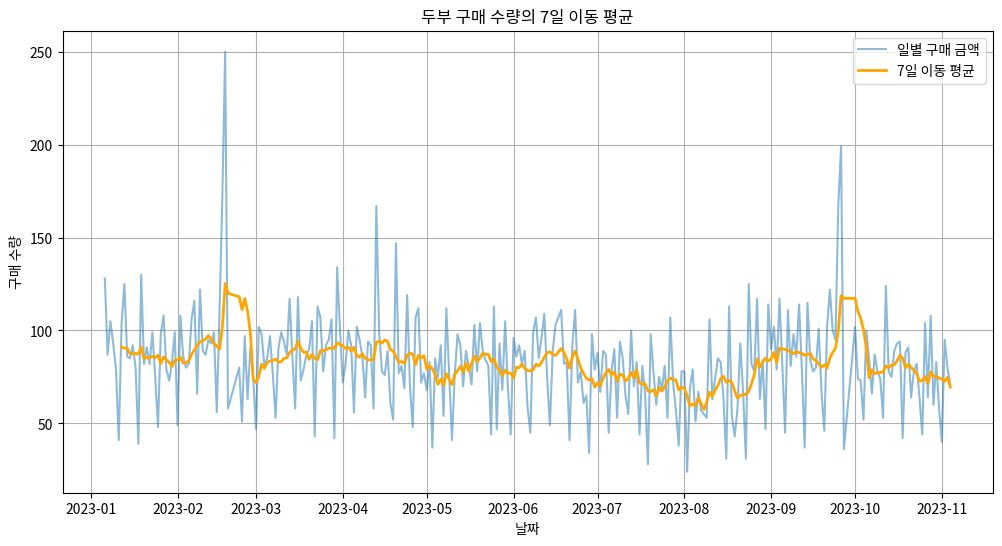

In [136]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정 (Linux에서 Noto Sans CJK 사용)
plt.rcParams['font.family'] = 'Noto Sans CJK JP'  # 설치된 한글 폰트로 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 날짜별 구매 금액과 7일 이동 평균 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['날짜'], daily_sales['구매수량'], label='일별 구매 금액', alpha=0.5)
plt.plot(daily_sales['날짜'], daily_sales['7일_이동평균'], label='7일 이동 평균', linewidth=2, color='orange')
plt.xlabel('날짜')
plt.ylabel('구매 수량')
plt.title('두부 구매 수량의 7일 이동 평균')
plt.legend()
plt.grid(True)
plt.show()

결측값:
 공급년도    0
공급월     0
공급일     0
dtype: int64


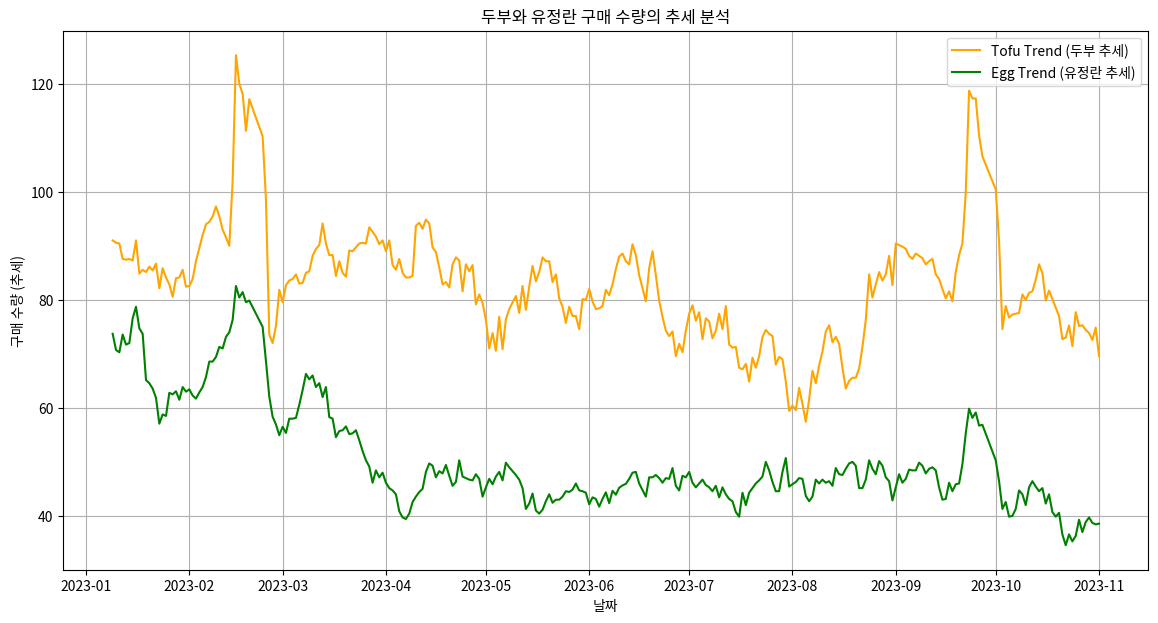

In [137]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 데이터 불러오기 및 결측값 처리
data2 = pd.read_csv("/home/piai/RFM_product.csv", encoding='euc-kr')
missing_data = data2[['공급년도', '공급월', '공급일']].isnull().sum()
print("결측값:\n", missing_data)

# 결측값이 있는 행 삭제
data2 = data2.dropna(subset=['공급년도', '공급월', '공급일'])

# 열 이름을 임시로 변경하고 날짜 생성
data2 = data2.rename(columns={'공급년도': 'year', '공급월': 'month', '공급일': 'day'})
data2['날짜'] = pd.to_datetime(data2[['year', 'month', 'day']])
data2 = data2.rename(columns={'year': '공급년도', 'month': '공급월', 'day': '공급일'})

# 두부와 유정란에 대한 데이터 필터링
tofu_data = data2[data2['물품소분류'] == '두부']
egg_data = data2[data2['물품소분류'] == '유정란']

# 날짜별 구매수량 합계 계산
tofu_daily_sales = tofu_data.groupby('날짜')['구매수량'].sum().reset_index()
egg_daily_sales = egg_data.groupby('날짜')['구매수량'].sum().reset_index()

# 인덱스 설정
tofu_daily_sales.set_index('날짜', inplace=True)
egg_daily_sales.set_index('날짜', inplace=True)

# 시계열 분해 (주기 설정 예: 7일 주기)
tofu_decomposition = seasonal_decompose(tofu_daily_sales['구매수량'], model='additive', period=7)
egg_decomposition = seasonal_decompose(egg_daily_sales['구매수량'], model='additive', period=7)

# 추세(Trend) 추출
tofu_trend = tofu_decomposition.trend
egg_trend = egg_decomposition.trend

# 추세 시각화
plt.figure(figsize=(14, 7))
plt.plot(tofu_trend, label='Tofu Trend (두부 추세)', color='orange')
plt.plot(egg_trend, label='Egg Trend (유정란 추세)', color='green')

# 그래프 제목 및 레이블 설정
plt.title('두부와 유정란 구매 수량의 추세 분석')
plt.xlabel('날짜')
plt.ylabel('구매 수량 (추세)')
plt.legend()
plt.grid(True)
plt.show()

            날짜  구매수량    7일_이동평균
0   2023-01-06  59.0        NaN
1   2023-01-07  67.0        NaN
2   2023-01-08  61.0        NaN
3   2023-01-09  67.0        NaN
4   2023-01-10  51.0        NaN
..         ...   ...        ...
290 2023-10-31  42.0  33.857143
291 2023-11-01  35.0  35.142857
292 2023-11-02  34.0  34.428571
293 2023-11-03  28.0  33.428571
294 2023-11-04  32.0  31.000000

[295 rows x 3 columns]


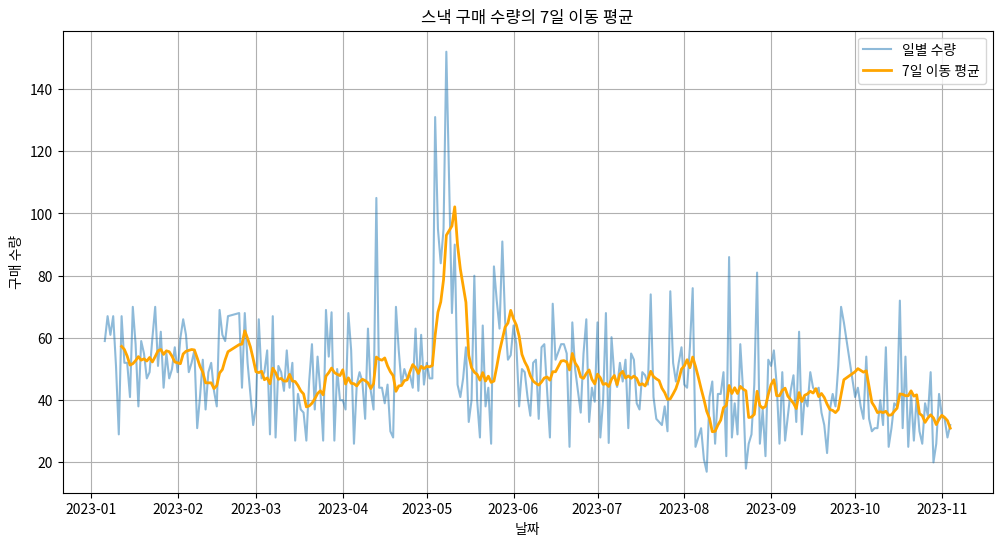

In [138]:
# 결측값이 있는 행 삭제
data2 = data2.dropna(subset=['공급년도', '공급월', '공급일'])

# 열 이름을 임시로 변경
data2 = data2.rename(columns={'공급년도': 'year', '공급월': 'month', '공급일': 'day'})

# 'year', 'month', 'day'를 사용해 날짜 생성
data2['날짜'] = pd.to_datetime(data2[['year', 'month', 'day']])

# 다시 원래 열 이름으로 복원
data2 = data2.rename(columns={'year': '공급년도', 'month': '공급월', 'day': '공급일'})

# 두부에 대한 데이터만 필터링
tofu_data = data2[data2['물품소분류'] == '스낵']

# 날짜별로 구매금액 합계 계산
daily_sales = tofu_data.groupby('날짜')['구매수량'].sum().reset_index()

# 이동 평균 계산 (7일 이동 평균)
daily_sales['7일_이동평균'] = daily_sales['구매수량'].rolling(window=7).mean()

# 결과 출력
print(daily_sales)
# 한글 폰트 설정 (Linux에서 Noto Sans CJK 사용)
plt.rcParams['font.family'] = 'Noto Sans CJK JP'  # 설치된 한글 폰트로 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 날짜별 구매 금액과 7일 이동 평균 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['날짜'], daily_sales['구매수량'], label='일별 수량', alpha=0.5)
plt.plot(daily_sales['날짜'], daily_sales['7일_이동평균'], label='7일 이동 평균', linewidth=2, color='orange')
plt.xlabel('날짜')
plt.ylabel('구매 수량')
plt.title('스낵 구매 수량의 7일 이동 평균')
plt.legend()
plt.grid(True)
plt.show()